# Install Imprtant Libraries

In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost scipy

Note: you may need to restart the kernel to use updated packages.


# Import Required Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve

# For modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# For evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# For statistical tests
from scipy import stats
from scipy.stats import chi2_contingency, spearmanr

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


# Import and Load CSV Files

In [4]:
# Load all CSV files
# Adjust file paths according to your directory structure

df_2021_22 = pd.read_csv('UDISE_2021_22_Table_6.13.csv')
df_2022_23 = pd.read_csv('UDISE_2022_23_Table_6.13.csv')
df_combined = pd.read_csv('UDISE_combined_with_year.csv')
df_2020_24 = pd.read_csv('UDISE_2020-24.csv')

print("Dataset Shapes:")
print(f"2021-22 Dataset: {df_2021_22.shape}")
print(f"2022-23 Dataset: {df_2022_23.shape}")
print(f"Combined Dataset: {df_combined.shape}")
print(f"2020-24 Dataset: {df_2020_24.shape}")

# Display first few rows
print("\n2021-22 Dataset Preview:")
print(df_2021_22.head())

print("\n2022-23 Dataset Preview:")
print(df_2022_23.head())

print("\nCombined Dataset Preview:")
print(df_combined.head())

print("\n2020-24 Dataset Preview:")
print(df_2020_24.head())

Dataset Shapes:
2021-22 Dataset: (37, 10)
2022-23 Dataset: (37, 11)
Combined Dataset: (111, 19)
2020-24 Dataset: (146, 6)

2021-22 Dataset Preview:
               India/State /UT  Dropout Rate - Primary (1 to 5) - Boys  \
0                        India                                     1.6   
1  Andaman and Nicobar Islands                                     0.2   
2               Andhra Pradesh                                     0.0   
3            Arunachal Pradesh                                     9.3   
4                        Assam                                     6.8   

   Dropout Rate - Primary (1 to 5) - Girls  \
0                                      1.4   
1                                      0.7   
2                                      0.0   
3                                      9.2   
4                                      5.2   

   Dropout Rate - Primary (1 to 5) - Total  \
0                                      1.5   
1                                     

# Data Cleaning and Preprocessing

In [5]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')
    return df

# Clean all datasets
df_2021_22 = clean_column_names(df_2021_22)
df_2022_23 = clean_column_names(df_2022_23)
df_combined = clean_column_names(df_combined)
df_2020_24 = clean_column_names(df_2020_24)

# Check for missing values
print("Missing Values in 2021-22 Dataset:")
print(df_2021_22.isnull().sum())

print("\nMissing Values in 2022-23 Dataset:")
print(df_2022_23.isnull().sum())

print("\nMissing Values in Combined Dataset:")
print(df_combined.isnull().sum())

print("\nMissing Values in 2020-24 Dataset:")
print(df_2020_24.isnull().sum())

# Handle missing values
# Fill numeric columns with median
numeric_cols_2021 = df_2021_22.select_dtypes(include=[np.number]).columns
df_2021_22[numeric_cols_2021] = df_2021_22[numeric_cols_2021].fillna(df_2021_22[numeric_cols_2021].median())

numeric_cols_2022 = df_2022_23.select_dtypes(include=[np.number]).columns
df_2022_23[numeric_cols_2022] = df_2022_23[numeric_cols_2022].fillna(df_2022_23[numeric_cols_2022].median())

numeric_cols_combined = df_combined.select_dtypes(include=[np.number]).columns
df_combined[numeric_cols_combined] = df_combined[numeric_cols_combined].fillna(df_combined[numeric_cols_combined].median())

numeric_cols_2020 = df_2020_24.select_dtypes(include=[np.number]).columns
df_2020_24[numeric_cols_2020] = df_2020_24[numeric_cols_2020].fillna(df_2020_24[numeric_cols_2020].median())

# Check data types
print("\nData Types in 2021-22 Dataset:")
print(df_2021_22.dtypes)

# Remove duplicates
df_2021_22 = df_2021_22.drop_duplicates()
df_2022_23 = df_2022_23.drop_duplicates()
df_combined = df_combined.drop_duplicates()
df_2020_24 = df_2020_24.drop_duplicates()

print(f"\nAfter cleaning - 2021-22 shape: {df_2021_22.shape}")
print(f"After cleaning - 2022-23 shape: {df_2022_23.shape}")
print(f"After cleaning - Combined shape: {df_combined.shape}")
print(f"After cleaning - 2020-24 shape: {df_2020_24.shape}")

Missing Values in 2021-22 Dataset:
India/State_/UT                               0
Dropout_Rate___Primary_(1_to_5)___Boys        0
Dropout_Rate___Primary_(1_to_5)___Girls       0
Dropout_Rate___Primary_(1_to_5)___Total       0
Dropout_Rate___Upper_Primary_(6_8)___Boys     0
Dropout_Rate___Upper_Primary_(6_8)___Girls    0
Dropout_Rate___Upper_Primary_(6_8)___Total    0
Dropout_Rate___Secondary_(9_10)___Boys        0
Dropout_Rate___Secondary_(9_10)___Girls       0
Dropout_Rate___Secondary_(9_10)___Total       0
dtype: int64

Missing Values in 2022-23 Dataset:
Sl._No.                                          0
India/State/UT                                   0
Dropout_Rate___Primary_(1_to_5)___Boys           0
Dropout_Rate___Primary_(1_to_5)___Girls          0
Dropout_Rate___Primary_(1_to_5)___Total          0
Dropout_Rate___Upper_Primary_(6_to_8)___Boys     0
Dropout_Rate___Upper_Primary_(6_to_8)___Girls    0
Dropout_Rate___Upper_Primary_(6_to_8)___Total    0
Dropout_Rate___Secondary_(9_

# Exploratory Data Analysis (EDA)

In [6]:
# Statistical Summary
print("Statistical Summary of 2021-22 Dataset:")
print(df_2021_22.describe())

print("\nStatistical Summary of 2022-23 Dataset:")
print(df_2022_23.describe())

# Focus on main dataset for detailed EDA (using combined dataset)
print("\n" + "="*80)
print("DETAILED EDA ON COMBINED DATASET")
print("="*80)

# Basic information
print("\nDataset Info:")
df_combined.info()

print("\nBasic Statistics:")
print(df_combined.describe())

# Correlation analysis
numeric_df = df_combined.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

Statistical Summary of 2021-22 Dataset:
       Dropout_Rate___Primary_(1_to_5)___Boys  \
count                               37.000000   
mean                                 2.686486   
std                                  3.629904   
min                                  0.000000   
25%                                  0.000000   
50%                                  1.000000   
75%                                  3.800000   
max                                 13.500000   

       Dropout_Rate___Primary_(1_to_5)___Girls  \
count                                37.000000   
mean                                  2.267568   
std                                   3.241404   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.600000   
75%                                   3.600000   
max                                  13.000000   

       Dropout_Rate___Primary_(1_to_5)___Total  \
count            

# Visualization - Distribution Plots

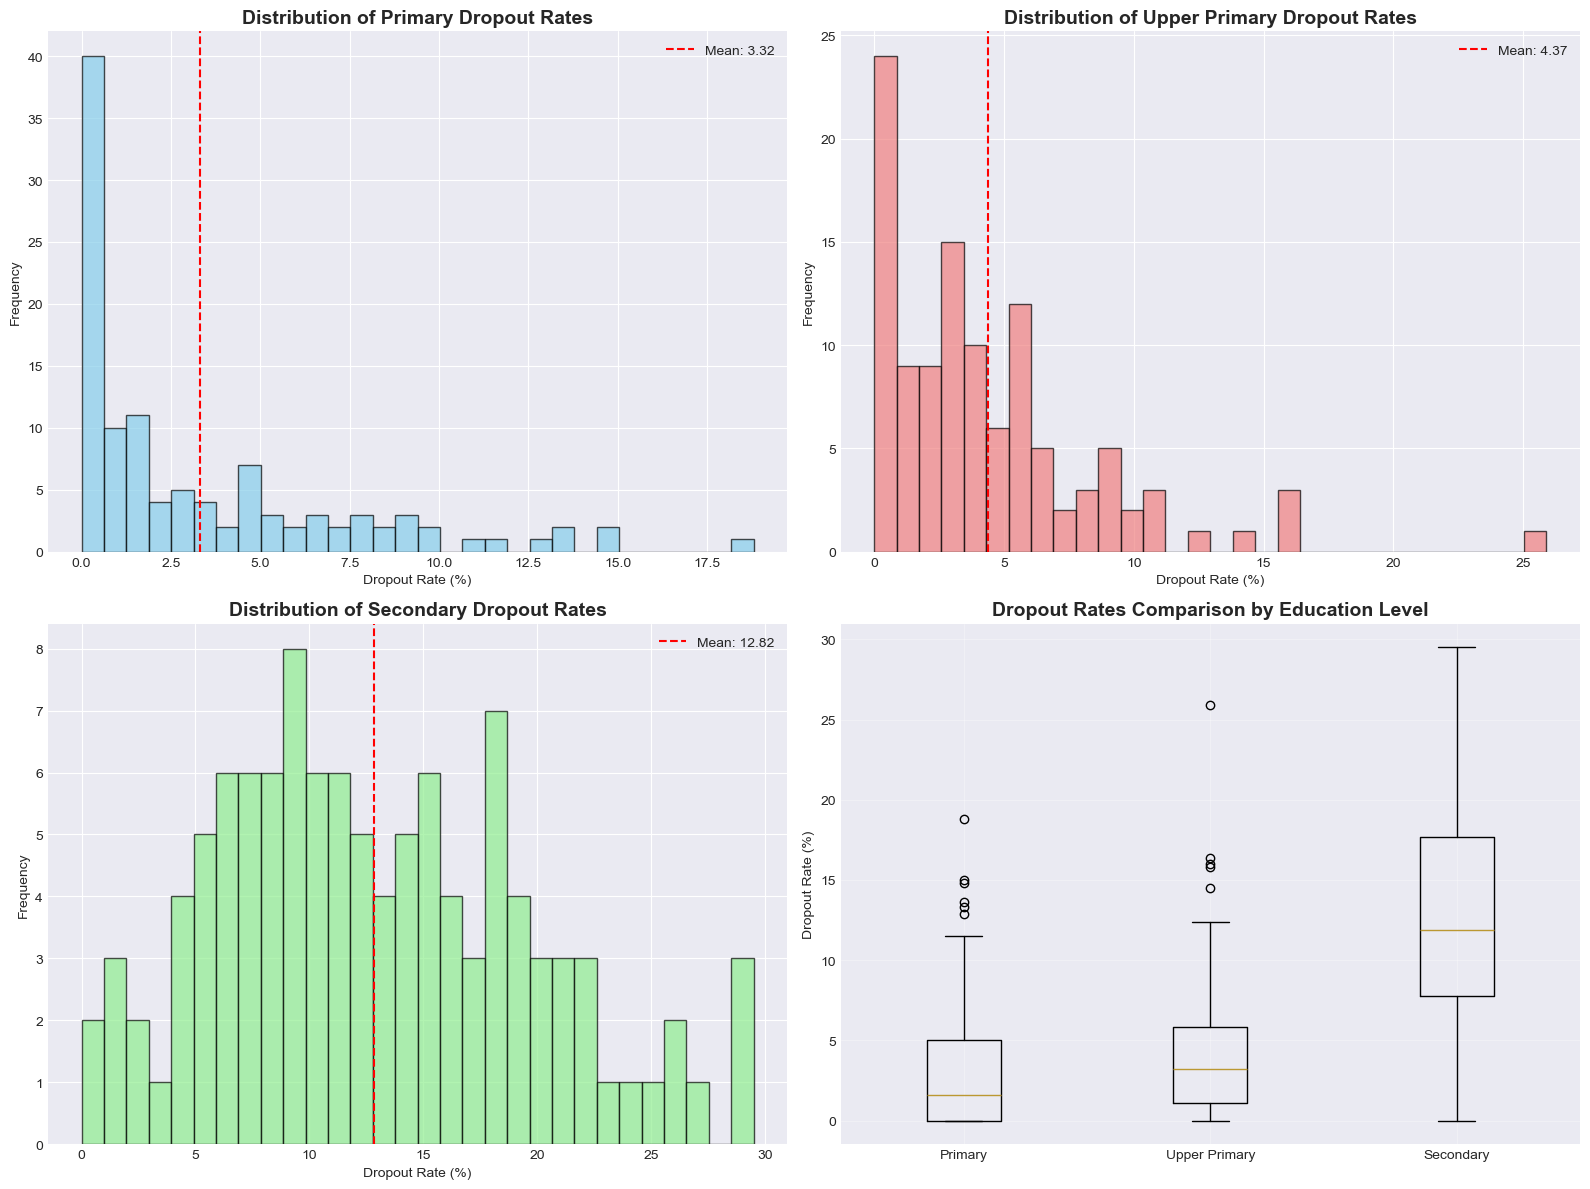

In [7]:
# Set up the plotting style
plt.rcParams['figure.figsize'] = (15, 10)

# 1. Distribution of Dropout Rates by Level
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Primary Dropout Rate Distribution
axes[0, 0].hist(df_combined['Dropout_Rate___Primary_(1_to_5)___Total'], 
                bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Primary Dropout Rates', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Dropout Rate (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_combined['Dropout_Rate___Primary_(1_to_5)___Total'].mean(), 
                   color='red', linestyle='--', label=f"Mean: {df_combined['Dropout_Rate___Primary_(1_to_5)___Total'].mean():.2f}")
axes[0, 0].legend()

# Upper Primary Dropout Rate Distribution
axes[0, 1].hist(df_combined['Dropout_Rate___Upper_Primary_(6_8)___Total'], 
                bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Upper Primary Dropout Rates', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Dropout Rate (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df_combined['Dropout_Rate___Upper_Primary_(6_8)___Total'].mean(), 
                   color='red', linestyle='--', label=f"Mean: {df_combined['Dropout_Rate___Upper_Primary_(6_8)___Total'].mean():.2f}")
axes[0, 1].legend()

# Secondary Dropout Rate Distribution
axes[1, 0].hist(df_combined['Dropout_Rate___Secondary_(9_10)___Total'], 
                bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Secondary Dropout Rates', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Dropout Rate (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df_combined['Dropout_Rate___Secondary_(9_10)___Total'].mean(), 
                   color='red', linestyle='--', label=f"Mean: {df_combined['Dropout_Rate___Secondary_(9_10)___Total'].mean():.2f}")
axes[1, 0].legend()

# Box plot comparison
data_to_plot = [df_combined['Dropout_Rate___Primary_(1_to_5)___Total'].dropna(),
                df_combined['Dropout_Rate___Upper_Primary_(6_8)___Total'].dropna(),
                df_combined['Dropout_Rate___Secondary_(9_10)___Total'].dropna()]

axes[1, 1].boxplot(data_to_plot, labels=['Primary', 'Upper Primary', 'Secondary'])
axes[1, 1].set_title('Dropout Rates Comparison by Education Level', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Dropout Rate (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dropout_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization - Gender-wise Analysis

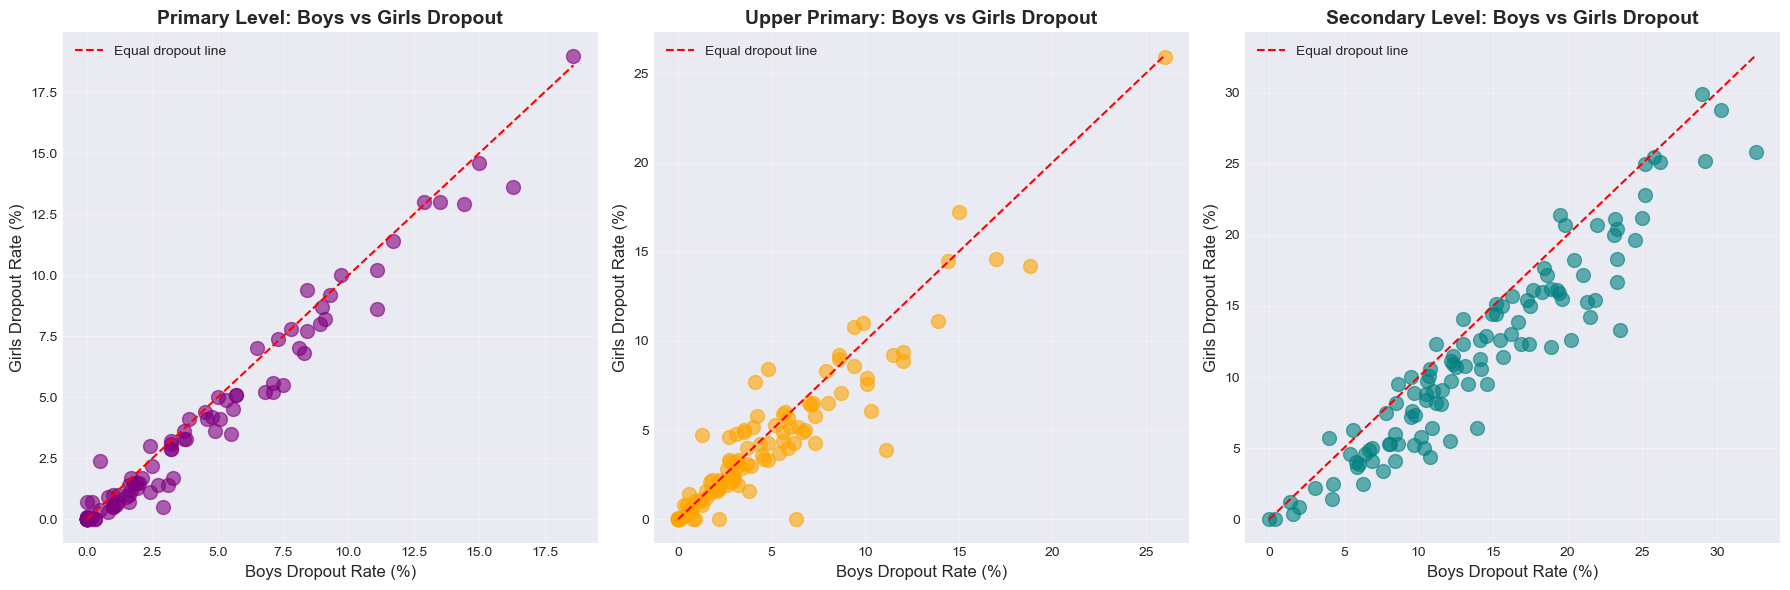

In [8]:
# Gender-wise dropout analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Primary Level
axes[0].scatter(df_combined['Dropout_Rate___Primary_(1_to_5)___Boys'], 
               df_combined['Dropout_Rate___Primary_(1_to_5)___Girls'], 
               alpha=0.6, s=100, c='purple')
axes[0].plot([0, df_combined['Dropout_Rate___Primary_(1_to_5)___Boys'].max()], 
            [0, df_combined['Dropout_Rate___Primary_(1_to_5)___Boys'].max()], 
            'r--', label='Equal dropout line')
axes[0].set_xlabel('Boys Dropout Rate (%)', fontsize=12)
axes[0].set_ylabel('Girls Dropout Rate (%)', fontsize=12)
axes[0].set_title('Primary Level: Boys vs Girls Dropout', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Upper Primary Level
axes[1].scatter(df_combined['Dropout_Rate___Upper_Primary_(6_8)___Boys'], 
               df_combined['Dropout_Rate___Upper_Primary_(6_8)___Girls'], 
               alpha=0.6, s=100, c='orange')
axes[1].plot([0, df_combined['Dropout_Rate___Upper_Primary_(6_8)___Boys'].max()], 
            [0, df_combined['Dropout_Rate___Upper_Primary_(6_8)___Boys'].max()], 
            'r--', label='Equal dropout line')
axes[1].set_xlabel('Boys Dropout Rate (%)', fontsize=12)
axes[1].set_ylabel('Girls Dropout Rate (%)', fontsize=12)
axes[1].set_title('Upper Primary: Boys vs Girls Dropout', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Secondary Level
axes[2].scatter(df_combined['Dropout_Rate___Secondary_(9_10)___Boys'], 
               df_combined['Dropout_Rate___Secondary_(9_10)___Girls'], 
               alpha=0.6, s=100, c='teal')
axes[2].plot([0, df_combined['Dropout_Rate___Secondary_(9_10)___Boys'].max()], 
            [0, df_combined['Dropout_Rate___Secondary_(9_10)___Boys'].max()], 
            'r--', label='Equal dropout line')
axes[2].set_xlabel('Boys Dropout Rate (%)', fontsize=12)
axes[2].set_ylabel('Girls Dropout Rate (%)', fontsize=12)
axes[2].set_title('Secondary Level: Boys vs Girls Dropout', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gender_wise_dropout.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization - State-wise Analysis

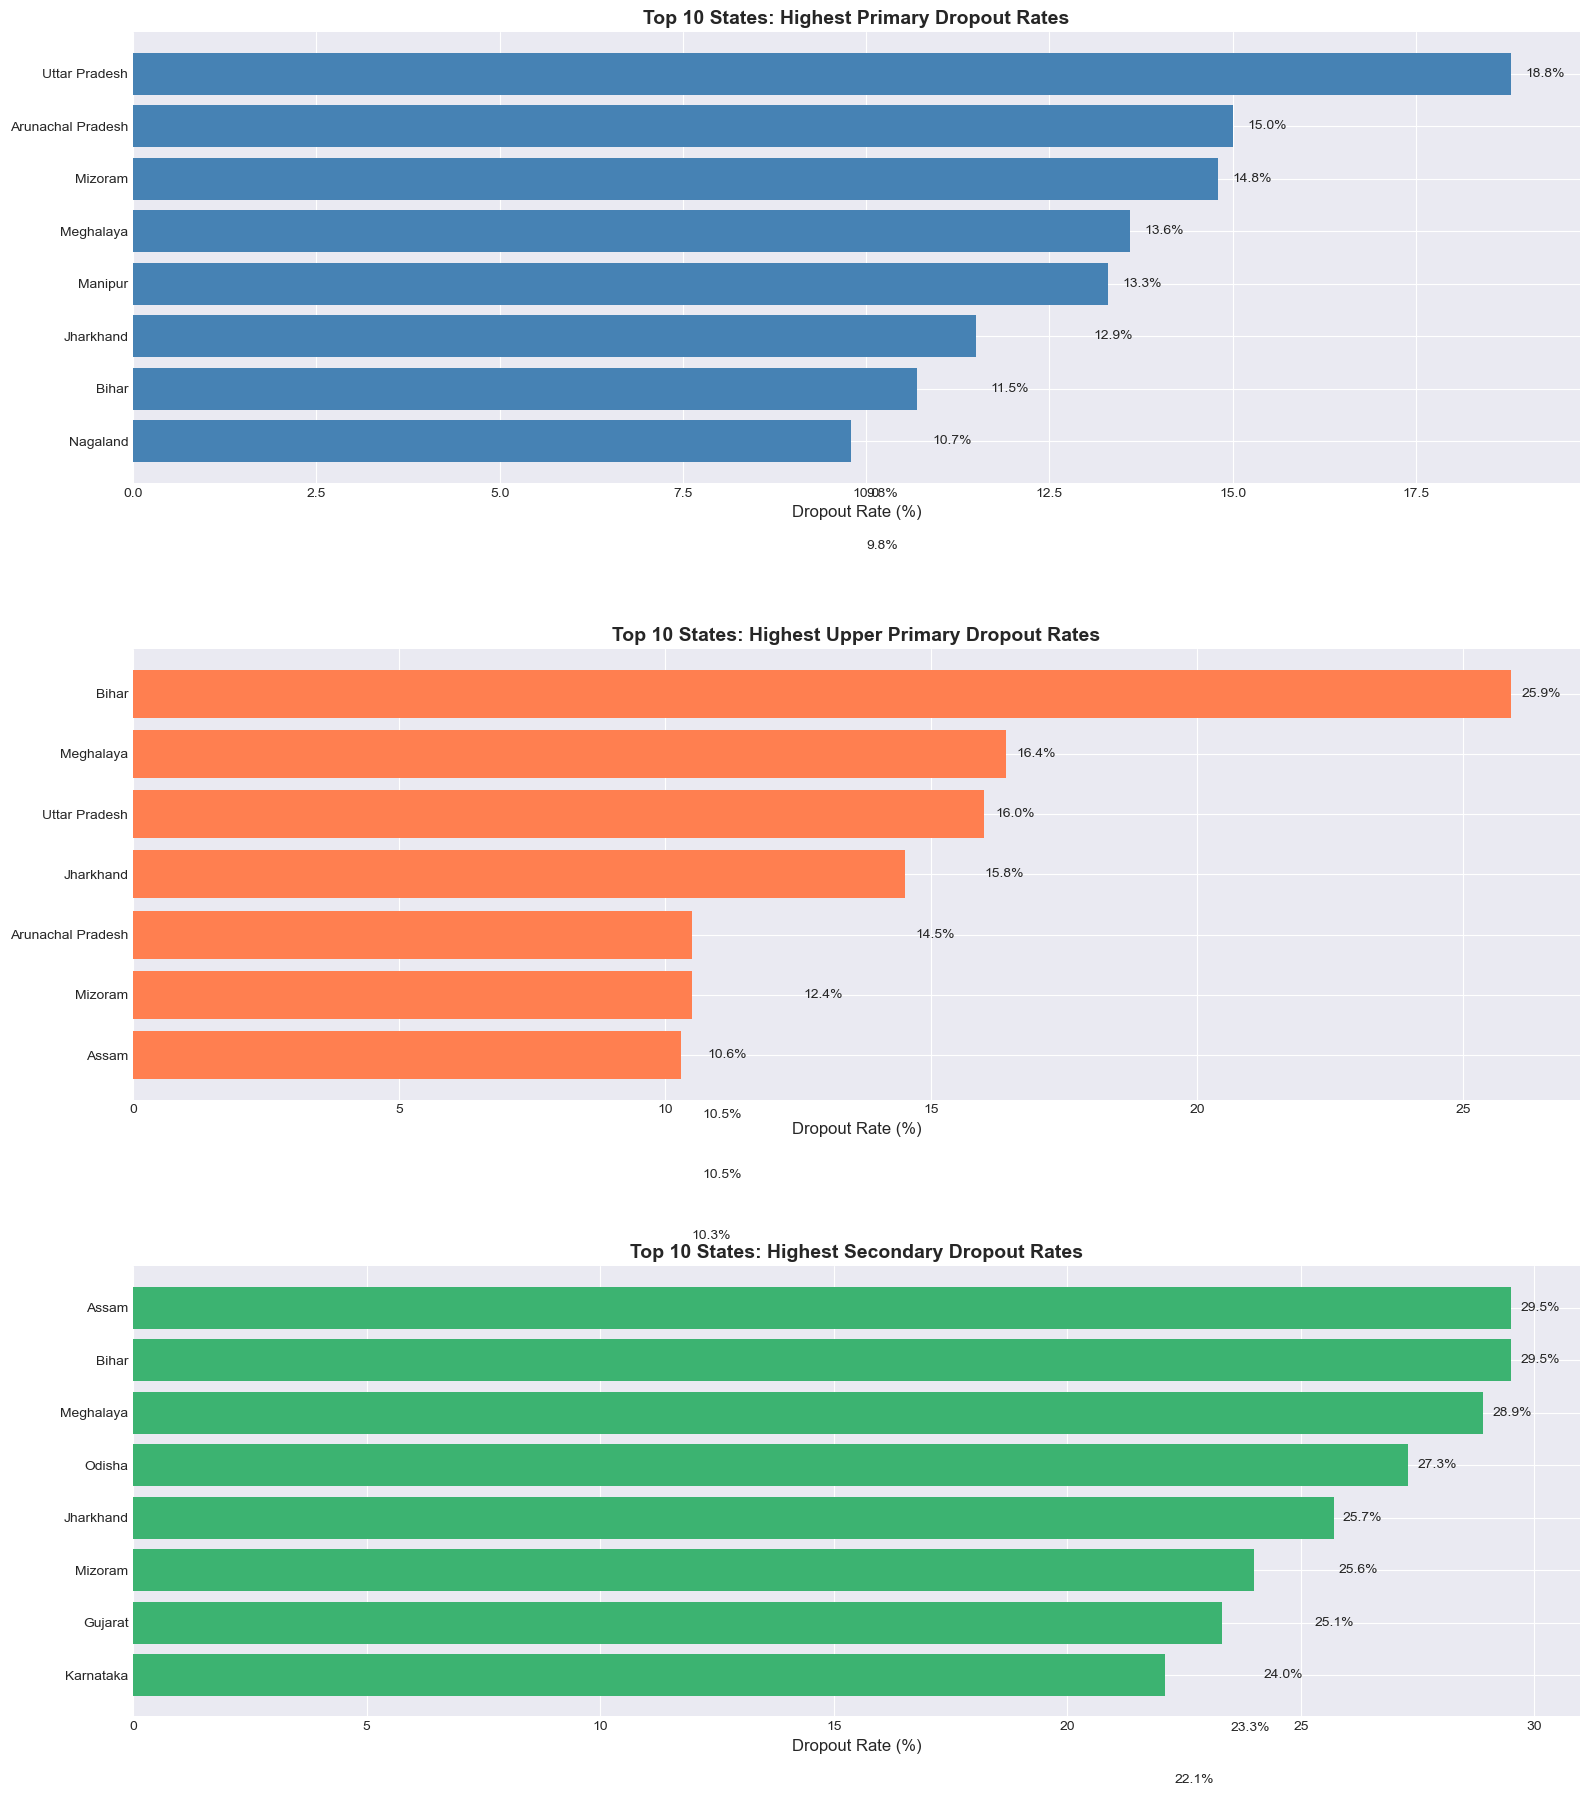

In [9]:
# Top 10 states with highest dropout rates at different levels
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

# Primary Level
primary_top = df_combined.nlargest(10, 'Dropout_Rate___Primary_(1_to_5)___Total')
axes[0].barh(primary_top['India/State_/UT'], 
            primary_top['Dropout_Rate___Primary_(1_to_5)___Total'], 
            color='steelblue')
axes[0].set_xlabel('Dropout Rate (%)', fontsize=12)
axes[0].set_title('Top 10 States: Highest Primary Dropout Rates', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
for i, v in enumerate(primary_top['Dropout_Rate___Primary_(1_to_5)___Total']):
    axes[0].text(v + 0.2, i, f'{v:.1f}%', va='center')

# Upper Primary Level
upper_primary_top = df_combined.nlargest(10, 'Dropout_Rate___Upper_Primary_(6_8)___Total')
axes[1].barh(upper_primary_top['India/State_/UT'], 
            upper_primary_top['Dropout_Rate___Upper_Primary_(6_8)___Total'], 
            color='coral')
axes[1].set_xlabel('Dropout Rate (%)', fontsize=12)
axes[1].set_title('Top 10 States: Highest Upper Primary Dropout Rates', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
for i, v in enumerate(upper_primary_top['Dropout_Rate___Upper_Primary_(6_8)___Total']):
    axes[1].text(v + 0.2, i, f'{v:.1f}%', va='center')

# Secondary Level
secondary_top = df_combined.nlargest(10, 'Dropout_Rate___Secondary_(9_10)___Total')
axes[2].barh(secondary_top['India/State_/UT'], 
            secondary_top['Dropout_Rate___Secondary_(9_10)___Total'], 
            color='mediumseagreen')
axes[2].set_xlabel('Dropout Rate (%)', fontsize=12)
axes[2].set_title('Top 10 States: Highest Secondary Dropout Rates', fontsize=14, fontweight='bold')
axes[2].invert_yaxis()
for i, v in enumerate(secondary_top['Dropout_Rate___Secondary_(9_10)___Total']):
    axes[2].text(v + 0.2, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.savefig('state_wise_dropout.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Heatmap

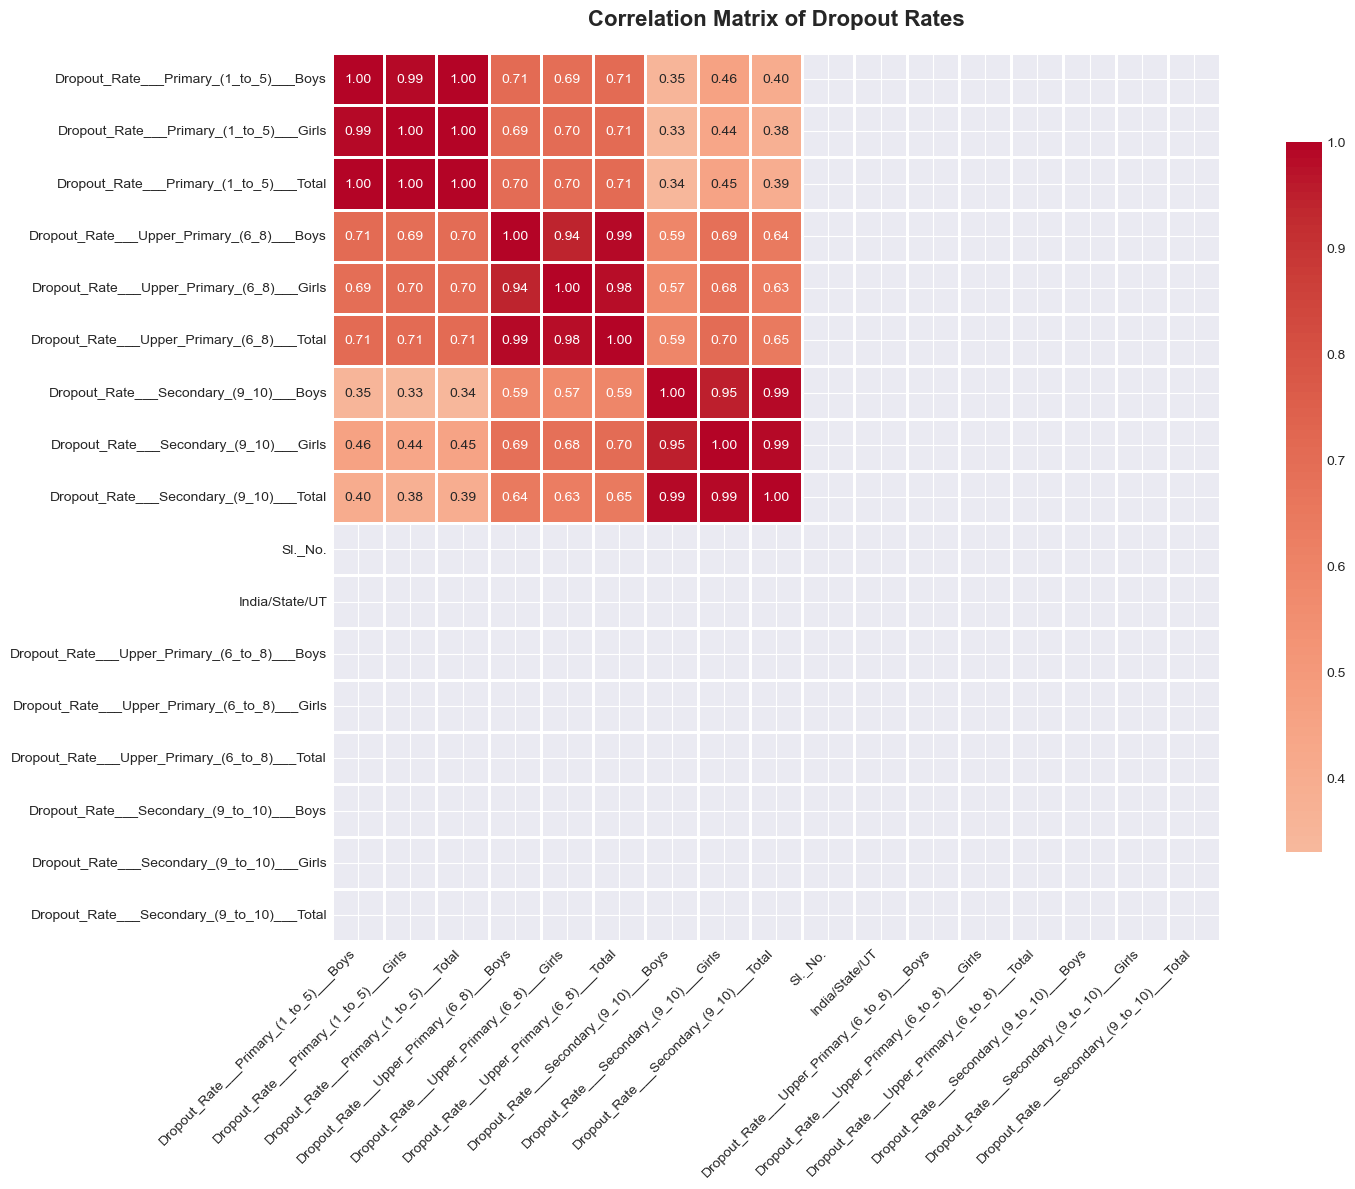


Strong Correlations (|r| > 0.7):
Dropout_Rate___Primary_(1_to_5)___Boys <-> Dropout_Rate___Primary_(1_to_5)___Girls: 0.987
Dropout_Rate___Primary_(1_to_5)___Boys <-> Dropout_Rate___Primary_(1_to_5)___Total: 0.997
Dropout_Rate___Primary_(1_to_5)___Boys <-> Dropout_Rate___Upper_Primary_(6_8)___Boys: 0.708
Dropout_Rate___Primary_(1_to_5)___Boys <-> Dropout_Rate___Upper_Primary_(6_8)___Total: 0.711
Dropout_Rate___Primary_(1_to_5)___Girls <-> Dropout_Rate___Primary_(1_to_5)___Total: 0.996
Dropout_Rate___Primary_(1_to_5)___Girls <-> Dropout_Rate___Upper_Primary_(6_8)___Girls: 0.702
Dropout_Rate___Primary_(1_to_5)___Girls <-> Dropout_Rate___Upper_Primary_(6_8)___Total: 0.707
Dropout_Rate___Primary_(1_to_5)___Total <-> Dropout_Rate___Upper_Primary_(6_8)___Boys: 0.702
Dropout_Rate___Primary_(1_to_5)___Total <-> Dropout_Rate___Upper_Primary_(6_8)___Total: 0.712
Dropout_Rate___Upper_Primary_(6_8)___Boys <-> Dropout_Rate___Upper_Primary_(6_8)___Girls: 0.937
Dropout_Rate___Upper_Primary_(6_8)___Bo

In [10]:
# Correlation heatmap
plt.figure(figsize=(16, 12))

# Select only numeric columns for correlation
numeric_columns = df_combined.select_dtypes(include=[np.number]).columns
correlation_matrix = df_combined[numeric_columns].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Dropout Rates', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Print strong correlations
print("\nStrong Correlations (|r| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

# Hypothesis Testing

In [11]:
print("="*80)
print("HYPOTHESIS TESTING")
print("="*80)

# Hypothesis 1: Is there a significant difference between boys and girls dropout rates?
print("\nHypothesis 1: Boys vs Girls Dropout Rates")
print("-" * 60)

# Primary Level
boys_primary = df_combined['Dropout_Rate___Primary_(1_to_5)___Boys'].dropna()
girls_primary = df_combined['Dropout_Rate___Primary_(1_to_5)___Girls'].dropna()
t_stat_primary, p_value_primary = stats.ttest_ind(boys_primary, girls_primary)
print(f"Primary Level:")
print(f"  Mean Boys: {boys_primary.mean():.2f}%, Mean Girls: {girls_primary.mean():.2f}%")
print(f"  T-statistic: {t_stat_primary:.4f}, P-value: {p_value_primary:.4f}")
print(f"  Result: {'Significant difference' if p_value_primary < 0.05 else 'No significant difference'}")

# Upper Primary Level
boys_upper = df_combined['Dropout_Rate___Upper_Primary_(6_8)___Boys'].dropna()
girls_upper = df_combined['Dropout_Rate___Upper_Primary_(6_8)___Girls'].dropna()
t_stat_upper, p_value_upper = stats.ttest_ind(boys_upper, girls_upper)
print(f"\nUpper Primary Level:")
print(f"  Mean Boys: {boys_upper.mean():.2f}%, Mean Girls: {girls_upper.mean():.2f}%")
print(f"  T-statistic: {t_stat_upper:.4f}, P-value: {p_value_upper:.4f}")
print(f"  Result: {'Significant difference' if p_value_upper < 0.05 else 'No significant difference'}")

# Secondary Level
boys_secondary = df_combined['Dropout_Rate___Secondary_(9_10)___Boys'].dropna()
girls_secondary = df_combined['Dropout_Rate___Secondary_(9_10)___Girls'].dropna()
t_stat_secondary, p_value_secondary = stats.ttest_ind(boys_secondary, girls_secondary)
print(f"\nSecondary Level:")
print(f"  Mean Boys: {boys_secondary.mean():.2f}%, Mean Girls: {girls_secondary.mean():.2f}%")
print(f"  T-statistic: {t_stat_secondary:.4f}, P-value: {p_value_secondary:.4f}")
print(f"  Result: {'Significant difference' if p_value_secondary < 0.05 else 'No significant difference'}")

# Hypothesis 2: Do dropout rates increase with education level?
print("\n\nHypothesis 2: Dropout Rates Across Education Levels")
print("-" * 60)

primary_rates = df_combined['Dropout_Rate___Primary_(1_to_5)___Total'].dropna()
upper_primary_rates = df_combined['Dropout_Rate___Upper_Primary_(6_8)___Total'].dropna()
secondary_rates = df_combined['Dropout_Rate___Secondary_(9_10)___Total'].dropna()

f_stat, p_value_anova = stats.f_oneway(primary_rates, upper_primary_rates, secondary_rates)
print(f"Mean Dropout Rates:")
print(f"  Primary: {primary_rates.mean():.2f}%")
print(f"  Upper Primary: {upper_primary_rates.mean():.2f}%")
print(f"  Secondary: {secondary_rates.mean():.2f}%")
print(f"\nANOVA Results:")
print(f"  F-statistic: {f_stat:.4f}, P-value: {p_value_anova:.6f}")
print(f"  Result: {'Significant difference across levels' if p_value_anova < 0.05 else 'No significant difference'}")

# Hypothesis 3: Correlation between primary and secondary dropout
print("\n\nHypothesis 3: Correlation between Primary and Secondary Dropout")
print("-" * 60)

correlation_coef, p_value_corr = stats.pearsonr(
    df_combined['Dropout_Rate___Primary_(1_to_5)___Total'].dropna(),
    df_combined['Dropout_Rate___Secondary_(9_10)___Total'].dropna()
)
print(f"Pearson Correlation Coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value_corr:.6f}")
print(f"Result: {'Significant positive correlation' if correlation_coef > 0 and p_value_corr < 0.05 else 'No significant correlation'}")

HYPOTHESIS TESTING

Hypothesis 1: Boys vs Girls Dropout Rates
------------------------------------------------------------
Primary Level:
  Mean Boys: 3.50%, Mean Girls: 3.12%
  T-statistic: 0.6877, P-value: 0.4924
  Result: No significant difference

Upper Primary Level:
  Mean Boys: 4.61%, Mean Girls: 4.13%
  T-statistic: 0.8195, P-value: 0.4134
  Result: No significant difference

Secondary Level:
  Mean Boys: 14.03%, Mean Girls: 11.55%
  T-statistic: 2.6821, P-value: 0.0079
  Result: Significant difference


Hypothesis 2: Dropout Rates Across Education Levels
------------------------------------------------------------
Mean Dropout Rates:
  Primary: 3.32%
  Upper Primary: 4.37%
  Secondary: 12.82%

ANOVA Results:
  F-statistic: 110.6099, P-value: 0.000000
  Result: Significant difference across levels


Hypothesis 3: Correlation between Primary and Secondary Dropout
------------------------------------------------------------
Pearson Correlation Coefficient: 0.3942
P-value: 0.00001

# Feature Engineering and Model Preparation

In [12]:
# Prepare data for modeling
print("="*80)
print("FEATURE ENGINEERING AND MODEL PREPARATION")
print("="*80)


# Create a working dataframe
df_model = df_combined.copy()

# Encode categorical variables (State/UT)
le = LabelEncoder()
df_model['State_Encoded'] = le.fit_transform(df_model['India/State_/UT'])

# ===== IMPROVED FEATURE ENGINEERING =====

# 1. Gender Gap Features (existing - keep these)
df_model['Gender_Gap_Primary'] = df_model['Dropout_Rate___Primary_(1_to_5)___Boys'] - df_model['Dropout_Rate___Primary_(1_to_5)___Girls']
df_model['Gender_Gap_Upper'] = df_model['Dropout_Rate___Upper_Primary_(6_8)___Boys'] - df_model['Dropout_Rate___Upper_Primary_(6_8)___Girls']
df_model['Gender_Gap_Secondary'] = df_model['Dropout_Rate___Secondary_(9_10)___Boys'] - df_model['Dropout_Rate___Secondary_(9_10)___Girls']

# 2. Average Dropout Rates (existing - keep these)
df_model['Avg_Dropout_Primary'] = (df_model['Dropout_Rate___Primary_(1_to_5)___Boys'] + df_model['Dropout_Rate___Primary_(1_to_5)___Girls']) / 2
df_model['Avg_Dropout_Upper'] = (df_model['Dropout_Rate___Upper_Primary_(6_8)___Boys'] + df_model['Dropout_Rate___Upper_Primary_(6_8)___Girls']) / 2
df_model['Avg_Dropout_Secondary'] = (df_model['Dropout_Rate___Secondary_(9_10)___Boys'] + df_model['Dropout_Rate___Secondary_(9_10)___Girls']) / 2

# 3. NEW: Progression Features (dropout rate changes between levels)
df_model['Dropout_Increase_Primary_to_Upper'] = df_model['Avg_Dropout_Upper'] - df_model['Avg_Dropout_Primary']
df_model['Dropout_Increase_Upper_to_Secondary'] = df_model['Avg_Dropout_Secondary'] - df_model['Avg_Dropout_Upper']

# 4. NEW: Gender Gap Trends
df_model['Gender_Gap_Change_Primary_to_Upper'] = df_model['Gender_Gap_Upper'] - df_model['Gender_Gap_Primary']
df_model['Gender_Gap_Change_Upper_to_Secondary'] = df_model['Gender_Gap_Secondary'] - df_model['Gender_Gap_Upper']

# 5. NEW: Absolute Gender Gap (magnitude regardless of direction)
df_model['Abs_Gender_Gap_Primary'] = abs(df_model['Gender_Gap_Primary'])
df_model['Abs_Gender_Gap_Upper'] = abs(df_model['Gender_Gap_Upper'])

# 6. NEW: Interaction features (which gender has higher dropout at each level)
df_model['Boys_Higher_Primary'] = (df_model['Dropout_Rate___Primary_(1_to_5)___Boys'] > df_model['Dropout_Rate___Primary_(1_to_5)___Girls']).astype(int)
df_model['Boys_Higher_Upper'] = (df_model['Dropout_Rate___Upper_Primary_(6_8)___Boys'] > df_model['Dropout_Rate___Upper_Primary_(6_8)___Girls']).astype(int)

# ===== FEATURE SELECTION =====
# Enhanced feature set with new engineered features
feature_columns = [
    'State_Encoded',
    # Original gender-specific rates
    'Dropout_Rate___Primary_(1_to_5)___Boys',
    'Dropout_Rate___Primary_(1_to_5)___Girls',
    'Dropout_Rate___Upper_Primary_(6_8)___Boys',
    'Dropout_Rate___Upper_Primary_(6_8)___Girls',
    # Gender gaps
    'Gender_Gap_Primary',
    'Gender_Gap_Upper',
    'Abs_Gender_Gap_Primary',
    'Abs_Gender_Gap_Upper',
    # Averages
    'Avg_Dropout_Primary',
    'Avg_Dropout_Upper',
    # NEW: Progression features
    'Dropout_Increase_Primary_to_Upper',
    'Dropout_Increase_Upper_to_Secondary',
    # NEW: Gender gap trends
    'Gender_Gap_Change_Primary_to_Upper',
    'Gender_Gap_Change_Upper_to_Secondary',
    # NEW: Gender dominance indicators
    'Boys_Higher_Primary',
    'Boys_Higher_Upper'
]

# Target variable: Secondary Dropout Rate (TOTAL, not just boys or girls)
target_column = 'Dropout_Rate___Secondary_(9_10)___Total'

# Remove rows with missing values in selected columns
df_model_clean = df_model[feature_columns + [target_column]].dropna()

# ===== CHECK FOR DATA ISSUES =====
print(f"\nData Shape before cleaning: {df_model.shape}")
print(f"Data Shape after cleaning: {df_model_clean.shape}")
print(f"Rows removed due to missing values: {df_model.shape[0] - df_model_clean.shape[0]}")

# Check for infinite values
inf_check = np.isinf(df_model_clean[feature_columns + [target_column]]).sum()
if inf_check.sum() > 0:
    print(f"\nWarning: Found infinite values in columns:")
    print(inf_check[inf_check > 0])
    df_model_clean = df_model_clean.replace([np.inf, -np.inf], np.nan).dropna()
    print(f"Shape after removing infinite values: {df_model_clean.shape}")

# Remove outliers using IQR method (optional but recommended)
def remove_outliers_iqr(df, columns, multiplier=1.5):
    """Remove outliers using IQR method"""
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal to target variable only
print(f"\nRemoving outliers from target variable...")
initial_size = len(df_model_clean)
df_model_clean = remove_outliers_iqr(df_model_clean, [target_column], multiplier=3.0)
print(f"Rows removed as outliers: {initial_size - len(df_model_clean)}")

X = df_model_clean[feature_columns]
y = df_model_clean[target_column]

print(f"\n{'='*60}")
print(f"FINAL FEATURE MATRIX SHAPE: {X.shape}")
print(f"FINAL TARGET VECTOR SHAPE: {y.shape}")
print(f"{'='*60}")

print("\n📊 Feature Columns:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n🎯 Target Column: {target_column}")

# ===== DATA QUALITY CHECKS =====
print(f"\n{'='*60}")
print("DATA QUALITY CHECKS")
print(f"{'='*60}")

print(f"\nTarget Variable Statistics:")
print(f"  Mean: {y.mean():.2f}")
print(f"  Median: {y.median():.2f}")
print(f"  Std Dev: {y.std():.2f}")
print(f"  Min: {y.min():.2f}")
print(f"  Max: {y.max():.2f}")

# Check feature correlations with target
print(f"\n📈 Feature Correlations with Target (Top 10):")
correlations = X.corrwith(y).sort_values(ascending=False)
print(correlations.head(10))

# Split data with stratification if possible
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print(f"\n{'='*60}")
print("DATA SPLIT")
print(f"{'='*60}")
print(f"Training Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing Set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Data prepared and standardized!")
print(f"   Features are now scaled with mean=0 and std=1")
print("="*80)

FEATURE ENGINEERING AND MODEL PREPARATION

Data Shape before cleaning: (111, 34)
Data Shape after cleaning: (111, 18)
Rows removed due to missing values: 0

Removing outliers from target variable...
Rows removed as outliers: 0

FINAL FEATURE MATRIX SHAPE: (111, 17)
FINAL TARGET VECTOR SHAPE: (111,)

📊 Feature Columns:
   1. State_Encoded
   2. Dropout_Rate___Primary_(1_to_5)___Boys
   3. Dropout_Rate___Primary_(1_to_5)___Girls
   4. Dropout_Rate___Upper_Primary_(6_8)___Boys
   5. Dropout_Rate___Upper_Primary_(6_8)___Girls
   6. Gender_Gap_Primary
   7. Gender_Gap_Upper
   8. Abs_Gender_Gap_Primary
   9. Abs_Gender_Gap_Upper
  10. Avg_Dropout_Primary
  11. Avg_Dropout_Upper
  12. Dropout_Increase_Primary_to_Upper
  13. Dropout_Increase_Upper_to_Secondary
  14. Gender_Gap_Change_Primary_to_Upper
  15. Gender_Gap_Change_Upper_to_Secondary
  16. Boys_Higher_Primary
  17. Boys_Higher_Upper

🎯 Target Column: Dropout_Rate___Secondary_(9_10)___Total

DATA QUALITY CHECKS

Target Variable Statis

# Model Building - Multiple Algorithms

In [13]:
# Initialize models with better hyperparameters
print("="*80)
print("MODEL BUILDING AND TRAINING")
print("="*80)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0, random_state=42),  # Increased regularization
    'Lasso Regression': Lasso(alpha=0.1, random_state=42, max_iter=2000),  # Adjusted alpha
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=2000),
    'Polynomial Regression (degree=2)': 'polynomial',
    'Decision Tree': DecisionTreeRegressor(
        random_state=42, 
        max_depth=5,  # Reduced to prevent overfitting
        min_samples_split=10,
        min_samples_leaf=5
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=200,  # Increased
        random_state=42, 
        max_depth=8,  # Reduced to prevent overfitting
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',  # Use subset of features
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=150, 
        random_state=42, 
        max_depth=4,  # Reduced
        learning_rate=0.05,  # Slower learning
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8  # Use 80% of data for each tree
    ),
    'XGBoost': XGBRegressor(
        n_estimators=150, 
        random_state=42, 
        max_depth=4,  # Reduced
        learning_rate=0.05,  # Slower learning
        min_child_weight=5,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,  # L1 regularization
        reg_lambda=1.0   # L2 regularization
    ),
    'SVR (RBF kernel)': SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1),  # Adjusted
    'SVR (Linear kernel)': SVR(kernel='linear', C=1.0, epsilon=0.1),
    'Neural Network (MLP)': MLPRegressor(
        hidden_layer_sizes=(64, 32, 16),  # Deeper but smaller layers
        max_iter=2000, 
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        learning_rate_init=0.001,
        alpha=0.01  # L2 regularization
    )
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")
    
    try:
        if name == 'Polynomial Regression (degree=2)':
            # Polynomial features with interaction_only to reduce complexity
            poly = PolynomialFeatures(degree=2, include_bias=False)
            X_train_poly = poly.fit_transform(X_train_scaled)
            X_test_poly = poly.transform(X_test_scaled)
            
            # Use Ridge regression for polynomial to prevent overfitting
            poly_model = Ridge(alpha=1.0, random_state=42)
            poly_model.fit(X_train_poly, y_train)
            
            y_train_pred = poly_model.predict(X_train_poly)
            y_test_pred = poly_model.predict(X_test_poly)
            
            # Cross-validation for polynomial
            cv_r2 = cross_val_score(poly_model, X_train_poly, y_train, cv=5, scoring='r2')
            cv_mse = -cross_val_score(poly_model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
            cv_mae = -cross_val_score(poly_model, X_train_poly, y_train, cv=5, scoring='neg_mean_absolute_error')
            
        else:
            # Train model
            model.fit(X_train_scaled, y_train)
            
            # Predictions
            y_train_pred = model.predict(X_train_scaled)
            y_test_pred = model.predict(X_test_scaled)
            
            # Cross-validation with multiple metrics
            cv_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
            cv_mse = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
            cv_mae = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Calculate overfitting indicators
        r2_gap = train_r2 - test_r2
        mae_gap = test_mae - train_mae
        
        # Store results
        results[name] = {
            'model': model if name != 'Polynomial Regression (degree=2)' else poly_model,
            'train_mse': train_mse,
            'train_rmse': train_rmse,
            'train_mae': train_mae,
            'train_r2': train_r2,
            'test_mse': test_mse,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2,
            'cv_r2_mean': cv_r2.mean(),
            'cv_r2_std': cv_r2.std(),
            'cv_mse_mean': cv_mse.mean(),
            'cv_mse_std': cv_mse.std(),
            'cv_mae_mean': cv_mae.mean(),
            'cv_mae_std': cv_mae.std(),
            'r2_gap': r2_gap,
            'mae_gap': mae_gap,
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred
        }
        
        # Display results
        print(f"\n📊 Training Metrics:")
        print(f"  MSE:      {train_mse:.4f}")
        print(f"  RMSE:     {train_rmse:.4f}")
        print(f"  MAE:      {train_mae:.4f}")
        print(f"  R² Score: {train_r2:.4f}")
        
        print(f"\n📊 Testing Metrics:")
        print(f"  MSE:      {test_mse:.4f}")
        print(f"  RMSE:     {test_rmse:.4f}")
        print(f"  MAE:      {test_mae:.4f}")
        print(f"  R² Score: {test_r2:.4f}")
        
        print(f"\n🔄 Cross-Validation Results (5-fold):")
        print(f"  R² Score: {cv_r2.mean():.4f} (±{cv_r2.std():.4f})")
        print(f"  MSE:      {cv_mse.mean():.4f} (±{cv_mse.std():.4f})")
        print(f"  MAE:      {cv_mae.mean():.4f} (±{cv_mae.std():.4f})")
        
        print(f"\n⚠️  Overfitting Indicators:")
        print(f"  R² Gap (Train - Test):   {r2_gap:.4f}")
        print(f"  MAE Gap (Test - Train):  {mae_gap:.4f}")
        
        if r2_gap > 0.2:
            print(f"  ⚠️  High overfitting detected!")
        elif r2_gap > 0.1:
            print(f"  ⚠️  Moderate overfitting detected")
        else:
            print(f"  ✅ Good generalization")
        
    except Exception as e:
        print(f"❌ Error training {name}: {str(e)}")
        continue

print("\n" + "="*80)
print("MODEL TRAINING COMPLETED")
print("="*80)

# ===== COMPREHENSIVE MODEL COMPARISON =====
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'CV R² (mean)': [results[m]['cv_r2_mean'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()],
    'CV MAE (mean)': [results[m]['cv_mae_mean'] for m in results.keys()],
    'R² Gap': [results[m]['r2_gap'] for m in results.keys()],
    'CV Std': [results[m]['cv_r2_std'] for m in results.keys()]
})

# Sort by CV R² score (most reliable metric)
comparison_df = comparison_df.sort_values('CV R² (mean)', ascending=False)

print("\n" + comparison_df.to_string(index=False))

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best Model (by CV R²): {best_model_name}")
print(f"   CV R²: {comparison_df.iloc[0]['CV R² (mean)']:.4f} (±{comparison_df.iloc[0]['CV Std']:.4f})")
print(f"   Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"   Test MAE: {comparison_df.iloc[0]['Test MAE']:.4f}")

# ===== FEATURE IMPORTANCE (for tree-based models) =====
print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

tree_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']
for model_name in tree_models:
    if model_name in results:
        model = results[model_name]['model']
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_imp_df = pd.DataFrame({
                'Feature': feature_columns,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
            
            print(f"\n📈 {model_name} - Top 10 Features:")
            print(feature_imp_df.head(10).to_string(index=False))

print("\n" + "="*80)

MODEL BUILDING AND TRAINING

Training: Linear Regression

📊 Training Metrics:
  MSE:      0.0051
  RMSE:     0.0714
  MAE:      0.0541
  R² Score: 0.9999

📊 Testing Metrics:
  MSE:      0.0161
  RMSE:     0.1271
  MAE:      0.0967
  R² Score: 0.9997

🔄 Cross-Validation Results (5-fold):
  R² Score: 0.9998 (±0.0001)
  MSE:      0.0080 (±0.0040)
  MAE:      0.0658 (±0.0143)

⚠️  Overfitting Indicators:
  R² Gap (Train - Test):   0.0002
  MAE Gap (Test - Train):  0.0426
  ✅ Good generalization

Training: Ridge Regression

📊 Training Metrics:
  MSE:      0.3299
  RMSE:     0.5744
  MAE:      0.4636
  R² Score: 0.9927

📊 Testing Metrics:
  MSE:      0.6378
  RMSE:     0.7986
  MAE:      0.6349
  R² Score: 0.9869

🔄 Cross-Validation Results (5-fold):
  R² Score: 0.9788 (±0.0074)
  MSE:      0.8141 (±0.1888)
  MAE:      0.7070 (±0.0947)

⚠️  Overfitting Indicators:
  R² Gap (Train - Test):   0.0058
  MAE Gap (Test - Train):  0.1712
  ✅ Good generalization

Training: Lasso Regression

📊 Traini

# Model Comparison and Results Summary

In [16]:
# Continue Model Comparison and Results Summary
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Train MAE': [results[m]['train_mae'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()],
    'CV R² Mean': [results[m]['cv_r2_mean'] for m in results.keys()],  # Changed from 'cv_mean'
    'CV R² Std': [results[m]['cv_r2_std'] for m in results.keys()],    # Changed from 'cv_std'
    'CV MSE Mean': [results[m]['cv_mse_mean'] for m in results.keys()],
    'CV MAE Mean': [results[m]['cv_mae_mean'] for m in results.keys()],
    'R² Gap': [results[m]['r2_gap'] for m in results.keys()],
    'MAE Gap': [results[m]['mae_gap'] for m in results.keys()]
})

# Sort by CV R² Mean (more reliable than single test R²)
comparison_df = comparison_df.sort_values('CV R² Mean', ascending=False)

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))

# Identify best model by CV score
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"  CV R² Score:  {comparison_df.iloc[0]['CV R² Mean']:.4f} (±{comparison_df.iloc[0]['CV R² Std']:.4f})")
print(f"  Test R² Score: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"  Test RMSE:     {comparison_df.iloc[0]['Test RMSE']:.4f}")
print(f"  Test MAE:      {comparison_df.iloc[0]['Test MAE']:.4f}")
print(f"  R² Gap:        {comparison_df.iloc[0]['R² Gap']:.4f}")
print(f"{'='*80}")

# Show top 3 models
print(f"\n{'='*80}")
print("TOP 3 MODELS (by Cross-Validation R²)")
print(f"{'='*80}")
for i in range(min(3, len(comparison_df))):
    model_name = comparison_df.iloc[i]['Model']
    cv_r2 = comparison_df.iloc[i]['CV R² Mean']
    cv_std = comparison_df.iloc[i]['CV R² Std']
    test_r2 = comparison_df.iloc[i]['Test R²']
    test_mae = comparison_df.iloc[i]['Test MAE']
    
    print(f"\n{i+1}. {model_name}")
    print(f"   CV R²:    {cv_r2:.4f} (±{cv_std:.4f})")
    print(f"   Test R²:  {test_r2:.4f}")
    print(f"   Test MAE: {test_mae:.4f}")

print("\n" + "="*80)


MODEL PERFORMANCE COMPARISON
                           Model  Train R²  Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE  CV R² Mean  CV R² Std  CV MSE Mean  CV MAE Mean   R² Gap  MAE Gap
               Linear Regression  0.999887 0.999669    0.071387   0.127061   0.054080  0.096702    0.999781   0.000134     0.008041     0.065847 0.000218 0.042622
             SVR (Linear kernel)  0.999868 0.999701    0.077053   0.120606   0.061158  0.084053    0.999771   0.000110     0.008582     0.069737 0.000167 0.022895
                Lasso Regression  0.999469 0.999192    0.154477   0.198365   0.123305  0.147174    0.999222   0.000295     0.031390     0.140208 0.000277 0.023870
                      ElasticNet  0.997786 0.997481    0.315541   0.350320   0.256463  0.272823    0.996217   0.001646     0.145081     0.300118 0.000305 0.016360
                Ridge Regression  0.992666 0.986910    0.574373   0.798602   0.463601  0.634850    0.978833   0.007400     0.814060     0.706995 0.005755 0

# Visualization - Model Performance Comparison

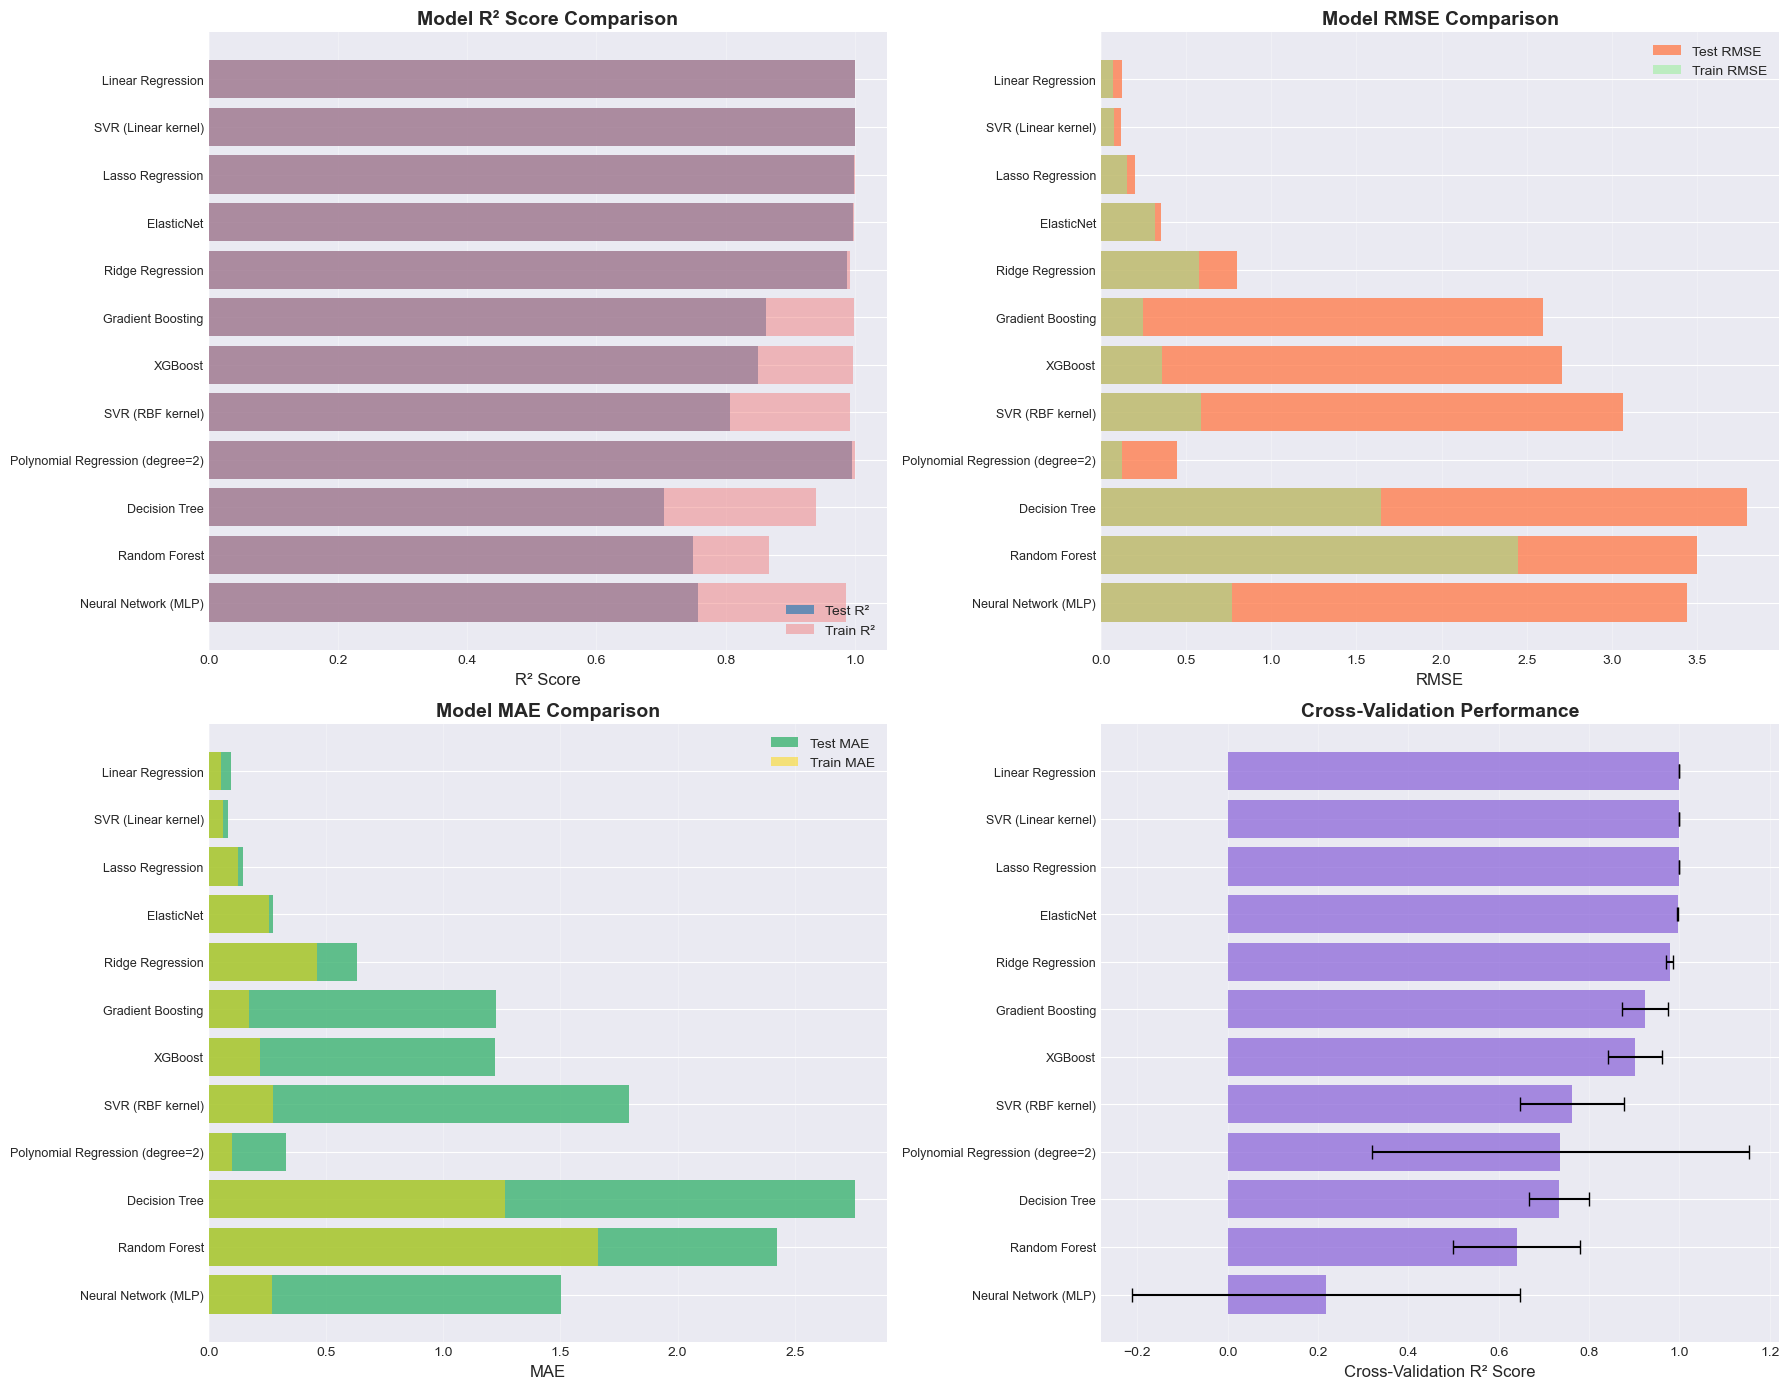

In [17]:
# Plot model comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. R² Score Comparison
x_pos = np.arange(len(comparison_df))
axes[0, 0].barh(x_pos, comparison_df['Test R²'], alpha=0.8, color='steelblue', label='Test R²')
axes[0, 0].barh(x_pos, comparison_df['Train R²'], alpha=0.5, color='lightcoral', label='Train R²')
axes[0, 0].set_yticks(x_pos)
axes[0, 0].set_yticklabels(comparison_df['Model'], fontsize=9)
axes[0, 0].set_xlabel('R² Score', fontsize=12)
axes[0, 0].set_title('Model R² Score Comparison', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. RMSE Comparison
axes[0, 1].barh(x_pos, comparison_df['Test RMSE'], alpha=0.8, color='coral', label='Test RMSE')
axes[0, 1].barh(x_pos, comparison_df['Train RMSE'], alpha=0.5, color='lightgreen', label='Train RMSE')
axes[0, 1].set_yticks(x_pos)
axes[0, 1].set_yticklabels(comparison_df['Model'], fontsize=9)
axes[0, 1].set_xlabel('RMSE', fontsize=12)
axes[0, 1].set_title('Model RMSE Comparison', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. MAE Comparison
axes[1, 0].barh(x_pos, comparison_df['Test MAE'], alpha=0.8, color='mediumseagreen', label='Test MAE')
axes[1, 0].barh(x_pos, comparison_df['Train MAE'], alpha=0.5, color='gold', label='Train MAE')
axes[1, 0].set_yticks(x_pos)
axes[1, 0].set_yticklabels(comparison_df['Model'], fontsize=9)
axes[1, 0].set_xlabel('MAE', fontsize=12)
axes[1, 0].set_title('Model MAE Comparison', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Cross-Validation Score with Error Bars
axes[1, 1].barh(x_pos, comparison_df['CV R² Mean'], xerr=comparison_df['CV R² Std'], 
                alpha=0.8, color='mediumpurple', capsize=5)
axes[1, 1].set_yticks(x_pos)
axes[1, 1].set_yticklabels(comparison_df['Model'], fontsize=9)
axes[1, 1].set_xlabel('Cross-Validation R² Score', fontsize=12)
axes[1, 1].set_title('Cross-Validation Performance', fontsize=14, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization - Actual vs Predicted (Best Models)

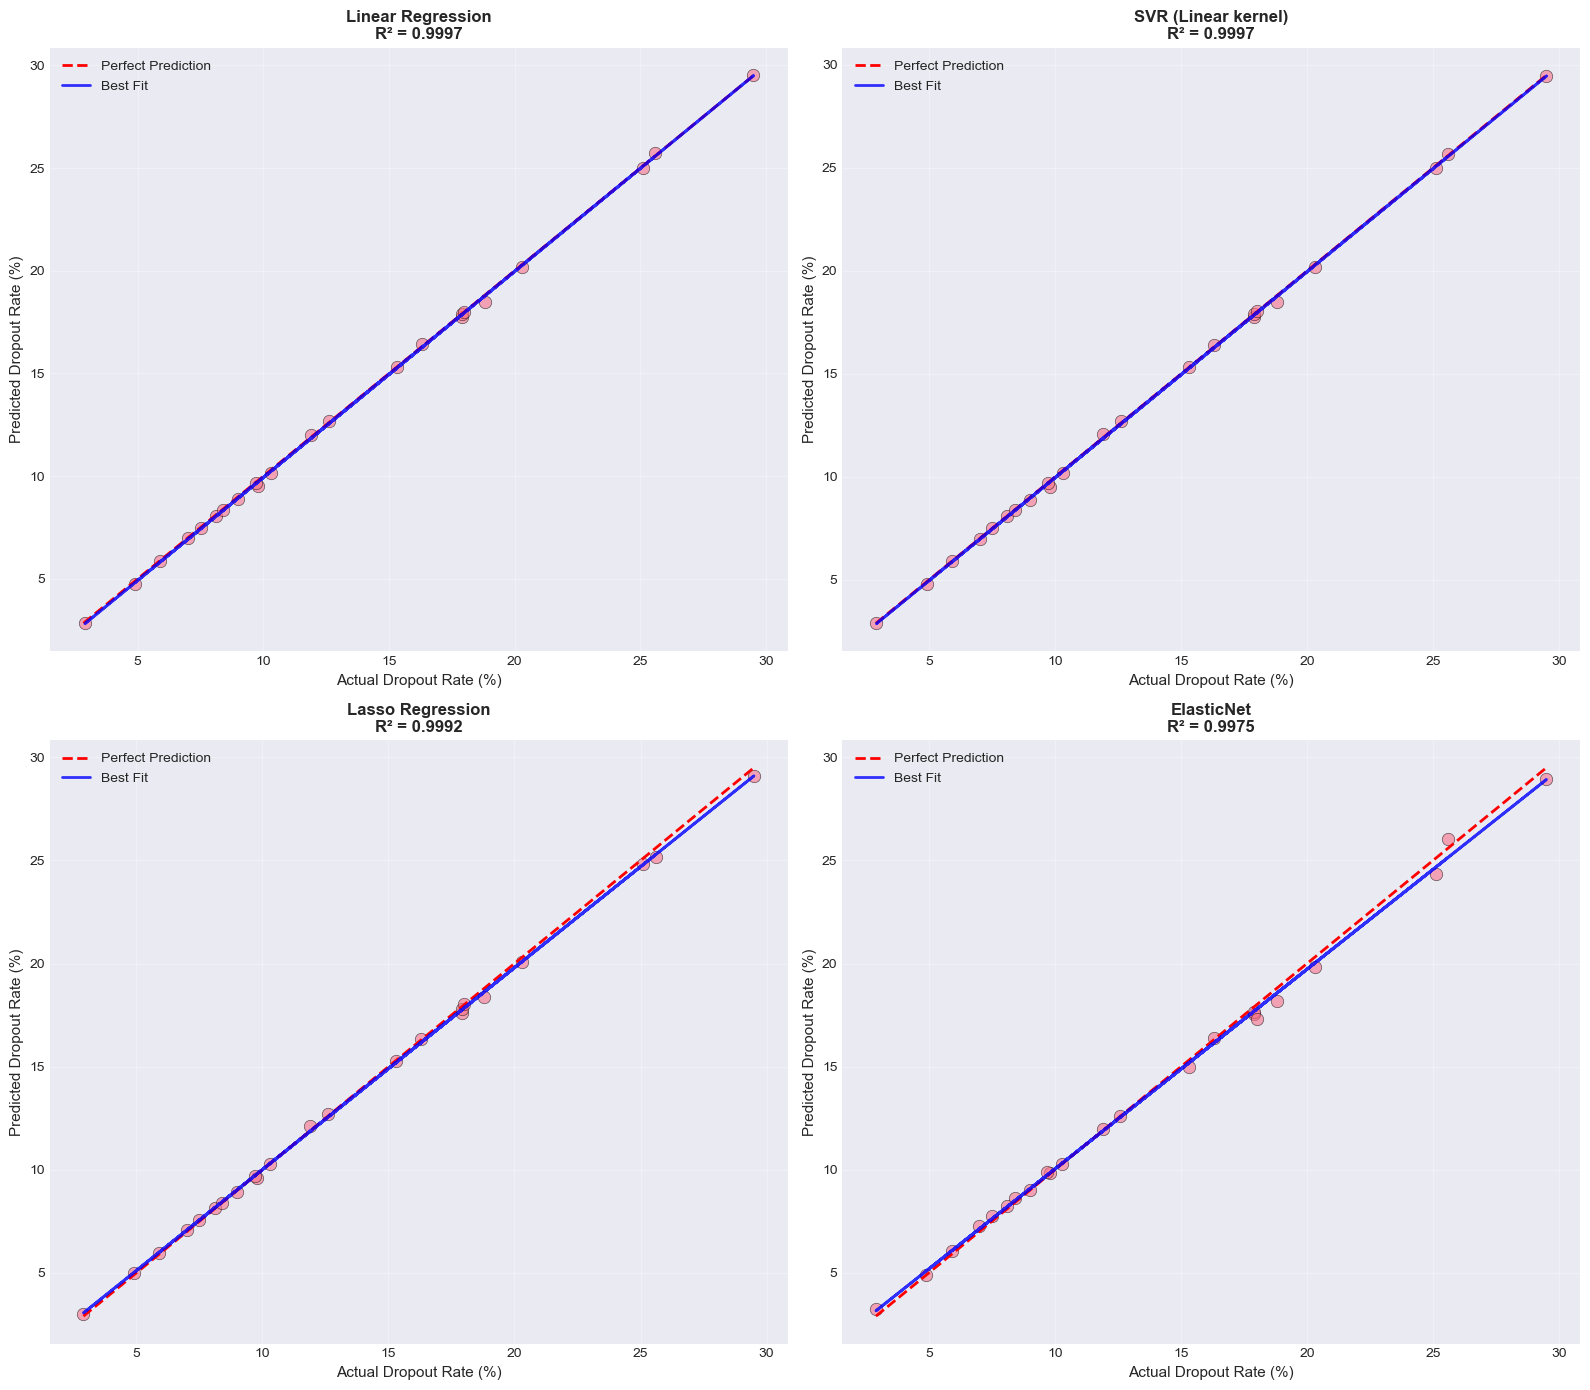

In [18]:
# Plot Actual vs Predicted for top 4 models
top_models = comparison_df.head(4)['Model'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, model_name in enumerate(top_models):
    y_test_pred = results[model_name]['y_test_pred']
    
    # Scatter plot
    axes[idx].scatter(y_test, y_test_pred, alpha=0.6, s=80, edgecolors='k', linewidths=0.5)
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    # Regression line
    z = np.polyfit(y_test, y_test_pred, 1)
    p = np.poly1d(z)
    axes[idx].plot(y_test, p(y_test), "b-", alpha=0.8, lw=2, label='Best Fit')
    
    axes[idx].set_xlabel('Actual Dropout Rate (%)', fontsize=11)
    axes[idx].set_ylabel('Predicted Dropout Rate (%)', fontsize=11)
    axes[idx].set_title(f'{model_name}\nR² = {results[model_name]["test_r2"]:.4f}', 
                       fontsize=12, fontweight='bold')
    axes[idx].legend(loc='upper left')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('actual_vs_predicted_top_models.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual Analysis

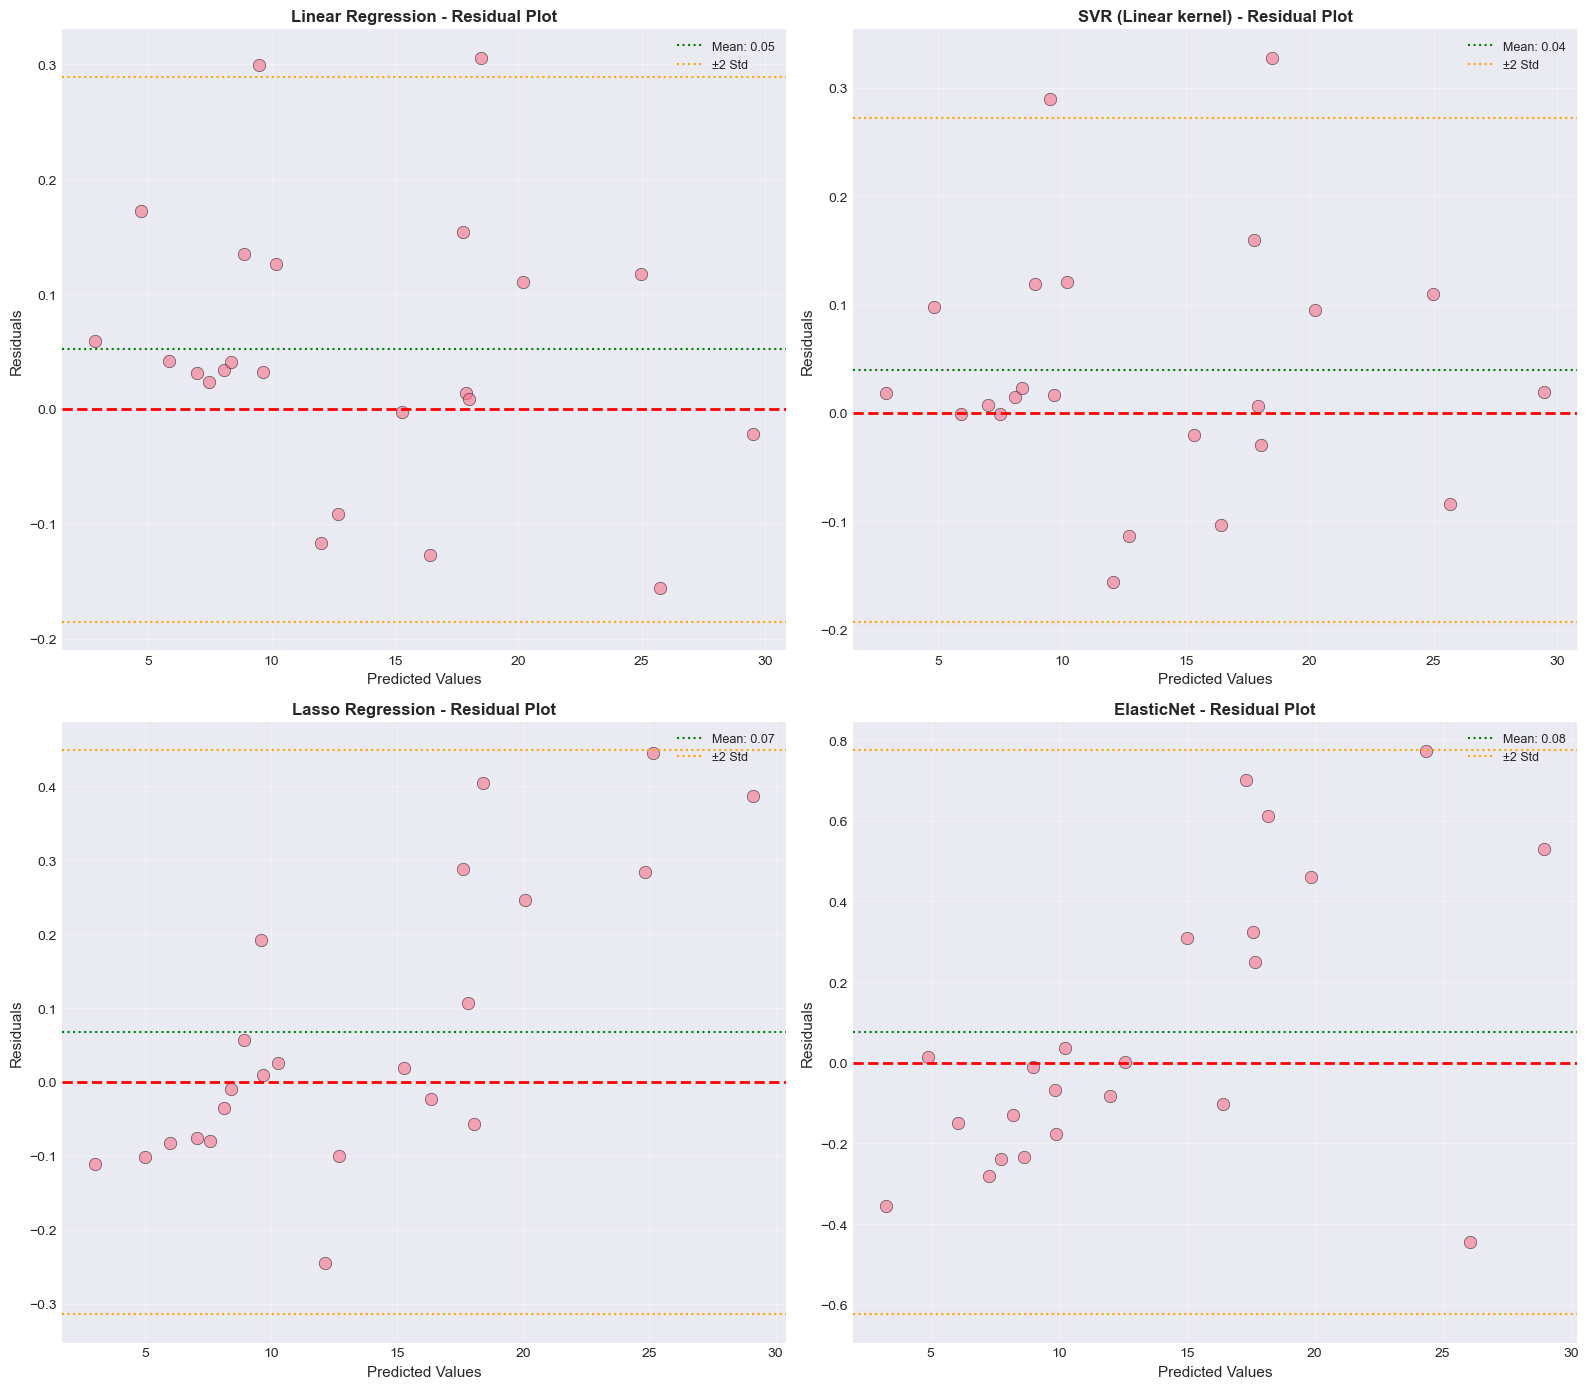

In [19]:
# Residual analysis for top 4 models
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, model_name in enumerate(top_models):
    y_test_pred = results[model_name]['y_test_pred']
    residuals = y_test - y_test_pred
    
    # Residual plot
    axes[idx].scatter(y_test_pred, residuals, alpha=0.6, s=80, edgecolors='k', linewidths=0.5)
    axes[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx].set_xlabel('Predicted Values', fontsize=11)
    axes[idx].set_ylabel('Residuals', fontsize=11)
    axes[idx].set_title(f'{model_name} - Residual Plot', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Add mean and std lines
    mean_residual = residuals.mean()
    std_residual = residuals.std()
    axes[idx].axhline(y=mean_residual, color='green', linestyle=':', lw=1.5, label=f'Mean: {mean_residual:.2f}')
    axes[idx].axhline(y=mean_residual + 2*std_residual, color='orange', linestyle=':', lw=1.5, label='±2 Std')
    axes[idx].axhline(y=mean_residual - 2*std_residual, color='orange', linestyle=':', lw=1.5)
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution of Residuals

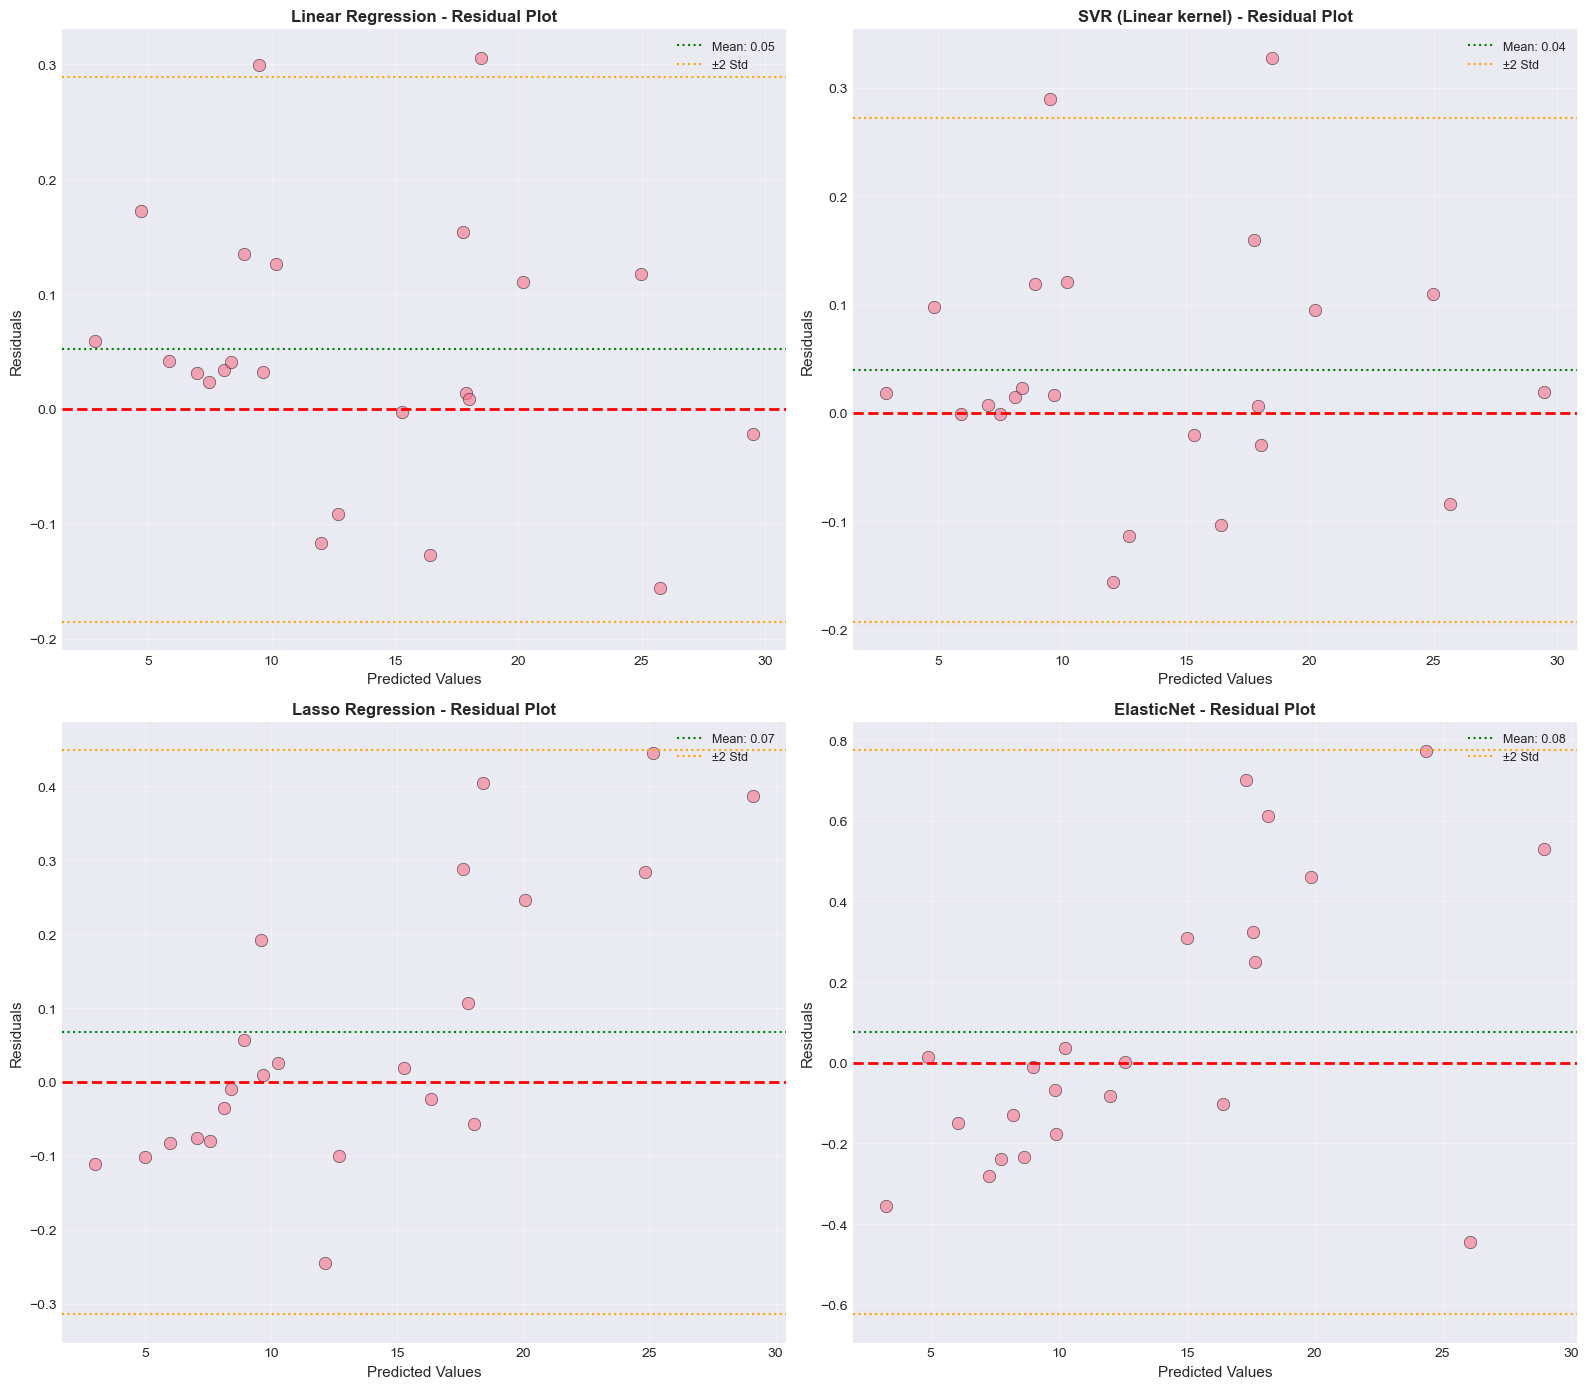

In [20]:
# Residual analysis for top 4 models
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, model_name in enumerate(top_models):
    y_test_pred = results[model_name]['y_test_pred']
    residuals = y_test - y_test_pred
    
    # Residual plot
    axes[idx].scatter(y_test_pred, residuals, alpha=0.6, s=80, edgecolors='k', linewidths=0.5)
    axes[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx].set_xlabel('Predicted Values', fontsize=11)
    axes[idx].set_ylabel('Residuals', fontsize=11)
    axes[idx].set_title(f'{model_name} - Residual Plot', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Add mean and std lines
    mean_residual = residuals.mean()
    std_residual = residuals.std()
    axes[idx].axhline(y=mean_residual, color='green', linestyle=':', lw=1.5, label=f'Mean: {mean_residual:.2f}')
    axes[idx].axhline(y=mean_residual + 2*std_residual, color='orange', linestyle=':', lw=1.5, label='±2 Std')
    axes[idx].axhline(y=mean_residual - 2*std_residual, color='orange', linestyle=':', lw=1.5)
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Learning Curves

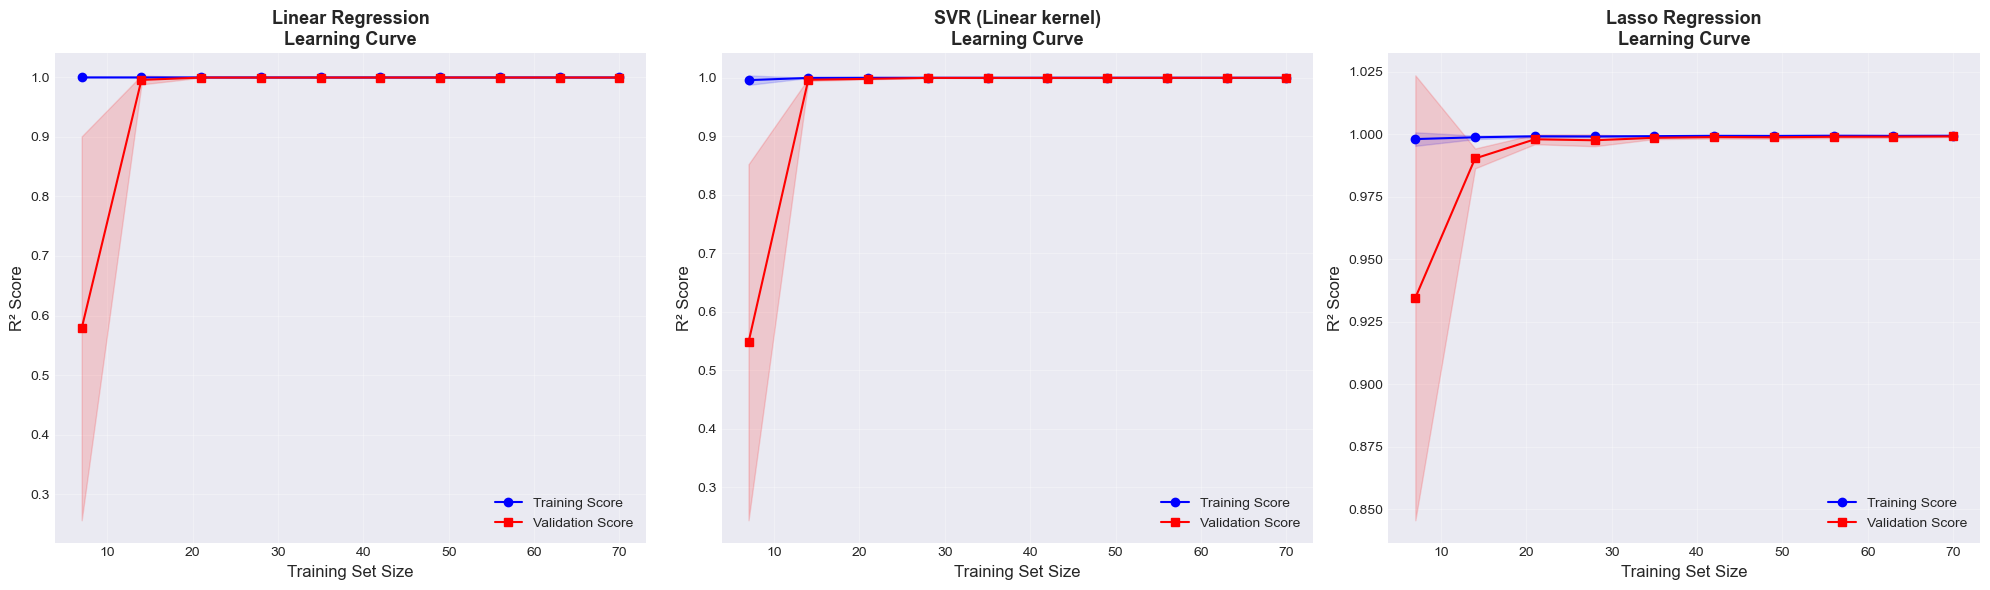

In [21]:
from sklearn.model_selection import learning_curve

# Learning curves for top 3 models
top_3_models = comparison_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, model_name in enumerate(top_3_models):
    model = results[model_name]['model']
    
    # Calculate learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_scaled, y_train, 
        cv=5, 
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
        random_state=42
    )
    
    # Calculate mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Plot
    axes[idx].plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
    axes[idx].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    
    axes[idx].plot(train_sizes, val_mean, label='Validation Score', color='red', marker='s')
    axes[idx].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='red')
    
    axes[idx].set_xlabel('Training Set Size', fontsize=12)
    axes[idx].set_ylabel('R² Score', fontsize=12)
    axes[idx].set_title(f'{model_name}\nLearning Curve', fontsize=13, fontweight='bold')
    axes[idx].legend(loc='lower right')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('learning_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance Analysis


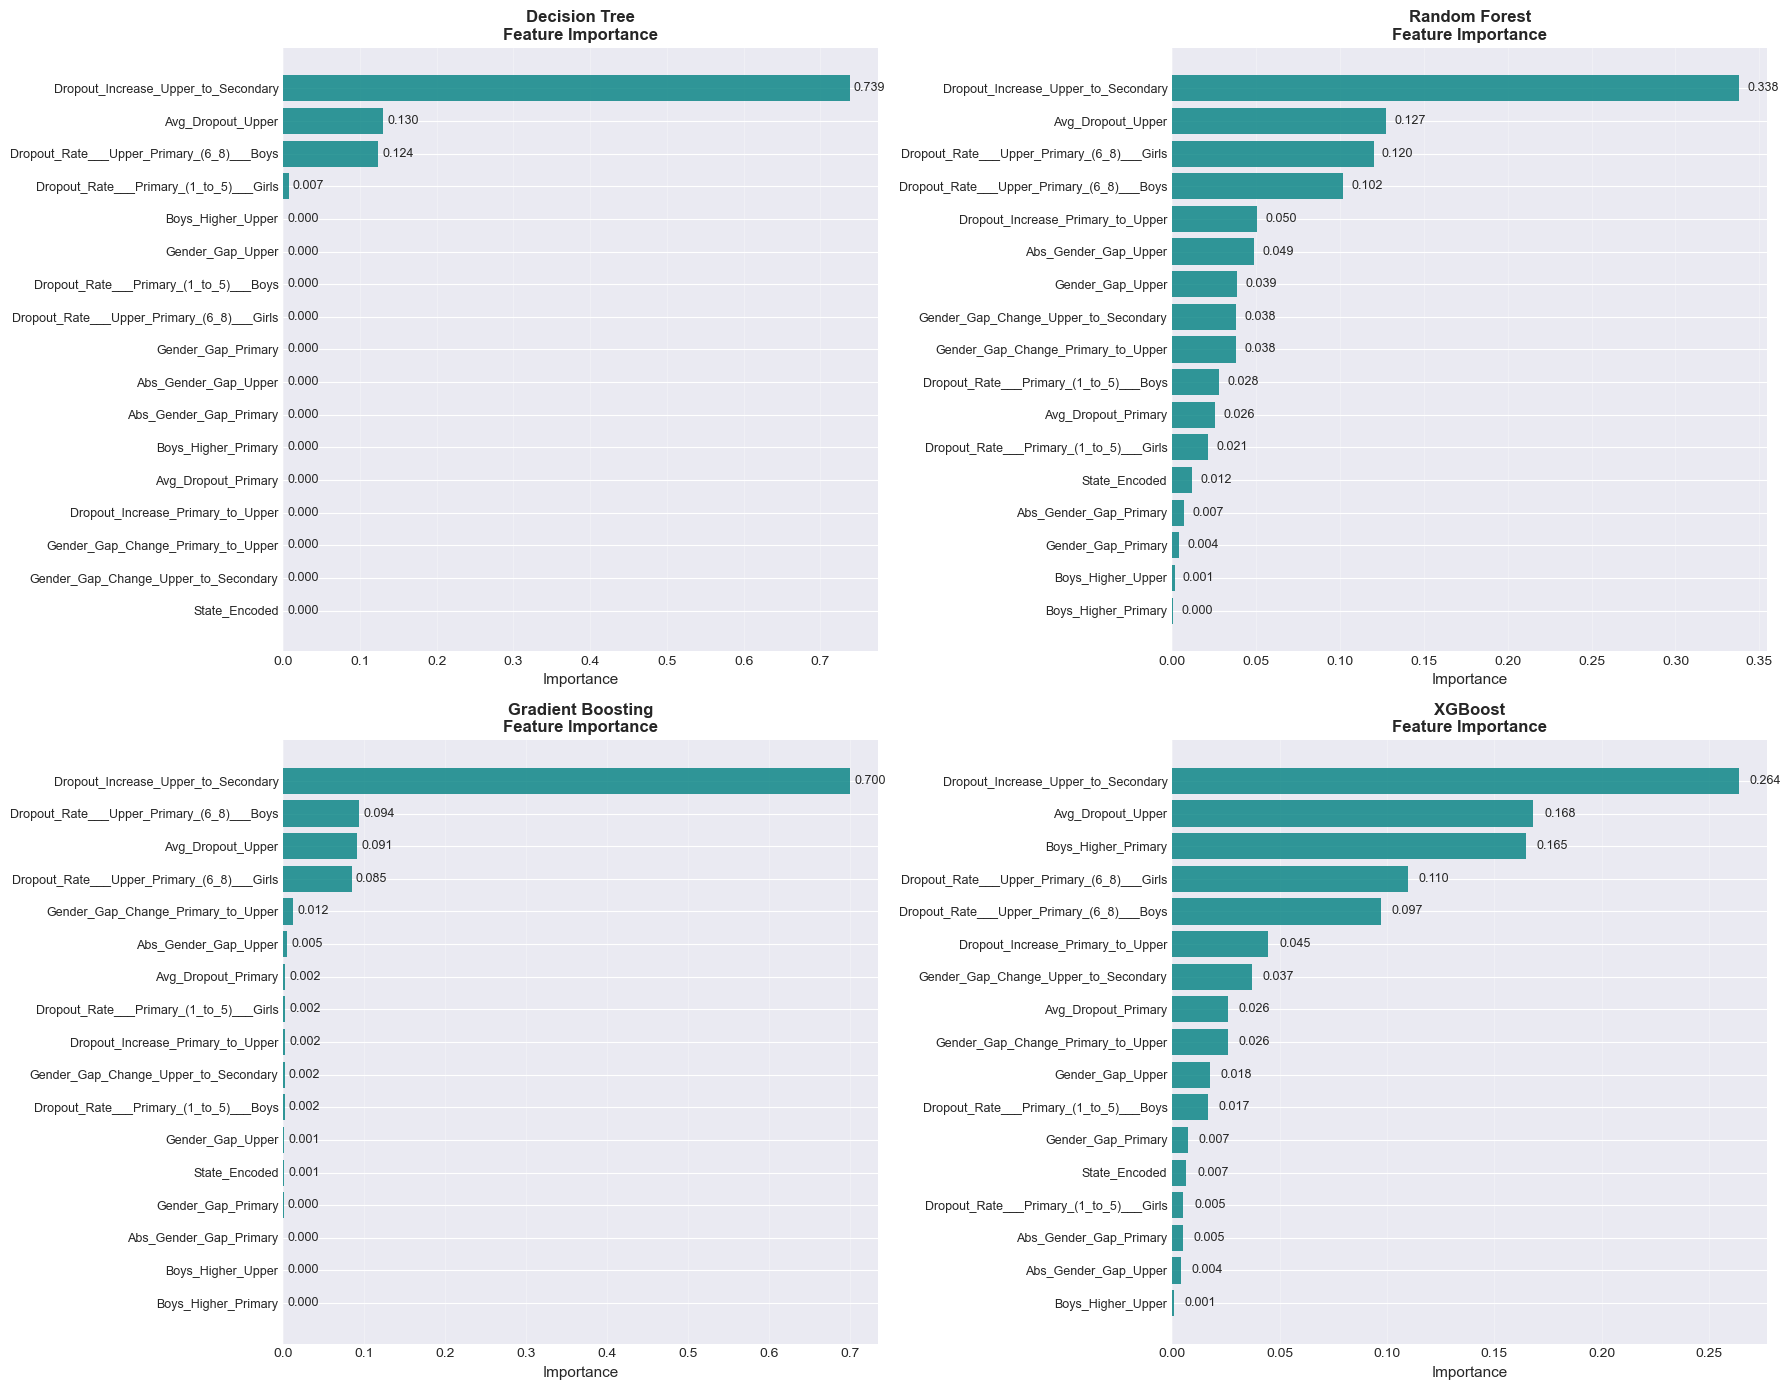

In [22]:
# Feature importance for tree-based models
tree_based_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
available_tree_models = [m for m in tree_based_models if m in results.keys()]

if available_tree_models:
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    axes = axes.ravel()
    
    for idx, model_name in enumerate(available_tree_models[:4]):
        model = results[model_name]['model']
        
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = feature_columns
            
            # Sort features by importance
            indices = np.argsort(importances)[::-1]
            
            # Plot
            axes[idx].barh(range(len(indices)), importances[indices], color='teal', alpha=0.8)
            axes[idx].set_yticks(range(len(indices)))
            axes[idx].set_yticklabels([feature_names[i] for i in indices], fontsize=9)
            axes[idx].set_xlabel('Importance', fontsize=11)
            axes[idx].set_title(f'{model_name}\nFeature Importance', fontsize=12, fontweight='bold')
            axes[idx].invert_yaxis()
            axes[idx].grid(axis='x', alpha=0.3)
            
            # Add values on bars
            for i, v in enumerate(importances[indices]):
                axes[idx].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)
    
    # Hide unused subplots
    for idx in range(len(available_tree_models), 4):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No tree-based models available for feature importance analysis.")

# Hyperparameter Tuning for Best Model

In [23]:
print("="*80)
print("HYPERPARAMETER TUNING FOR BEST MODEL")
print("="*80)

# Get the best model name
best_model_name = comparison_df.iloc[0]['Model']
print(f"\nTuning: {best_model_name}")

# Define hyperparameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Ridge Regression': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'Lasso Regression': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'SVR (RBF kernel)': {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    }
}

# Perform grid search if model is in param_grids
if best_model_name in param_grids:
    print(f"\nPerforming Grid Search for {best_model_name}...")
    
    # Get base model
    if best_model_name == 'Random Forest':
        base_model = RandomForestRegressor(random_state=42)
    elif best_model_name == 'XGBoost':
        base_model = XGBRegressor(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        base_model = GradientBoostingRegressor(random_state=42)
    elif best_model_name == 'Ridge Regression':
        base_model = Ridge(random_state=42)
    elif best_model_name == 'Lasso Regression':
        base_model = Lasso(random_state=42)
    elif best_model_name == 'SVR (RBF kernel)':
        base_model = SVR(kernel='rbf')
    
    # Grid search
    grid_search = GridSearchCV(
        base_model,
        param_grids[best_model_name],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Best CV Score: {grid_search.best_score_:.4f}")
    
    # Evaluate tuned model
    tuned_model = grid_search.best_estimator_
    y_train_pred_tuned = tuned_model.predict(X_train_scaled)
    y_test_pred_tuned = tuned_model.predict(X_test_scaled)
    
    print(f"\nTuned Model Performance:")
    print(f"  Train R²: {r2_score(y_train, y_train_pred_tuned):.4f}")
    print(f"  Test R²: {r2_score(y_test, y_test_pred_tuned):.4f}")
    print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_tuned)):.4f}")
    print(f"  Test MAE: {mean_absolute_error(y_test, y_test_pred_tuned):.4f}")
    
    # Store tuned model results
    results['Tuned_' + best_model_name] = {
        'model': tuned_model,
        'train_r2': r2_score(y_train, y_train_pred_tuned),
        'test_r2': r2_score(y_test, y_test_pred_tuned),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_tuned)),
        'test_mae': mean_absolute_error(y_test, y_test_pred_tuned),
        'y_test_pred': y_test_pred_tuned
    }
else:
    print(f"\nHyperparameter tuning not configured for {best_model_name}")

HYPERPARAMETER TUNING FOR BEST MODEL

Tuning: Linear Regression

Hyperparameter tuning not configured for Linear Regression


# Prediction Error Analysis

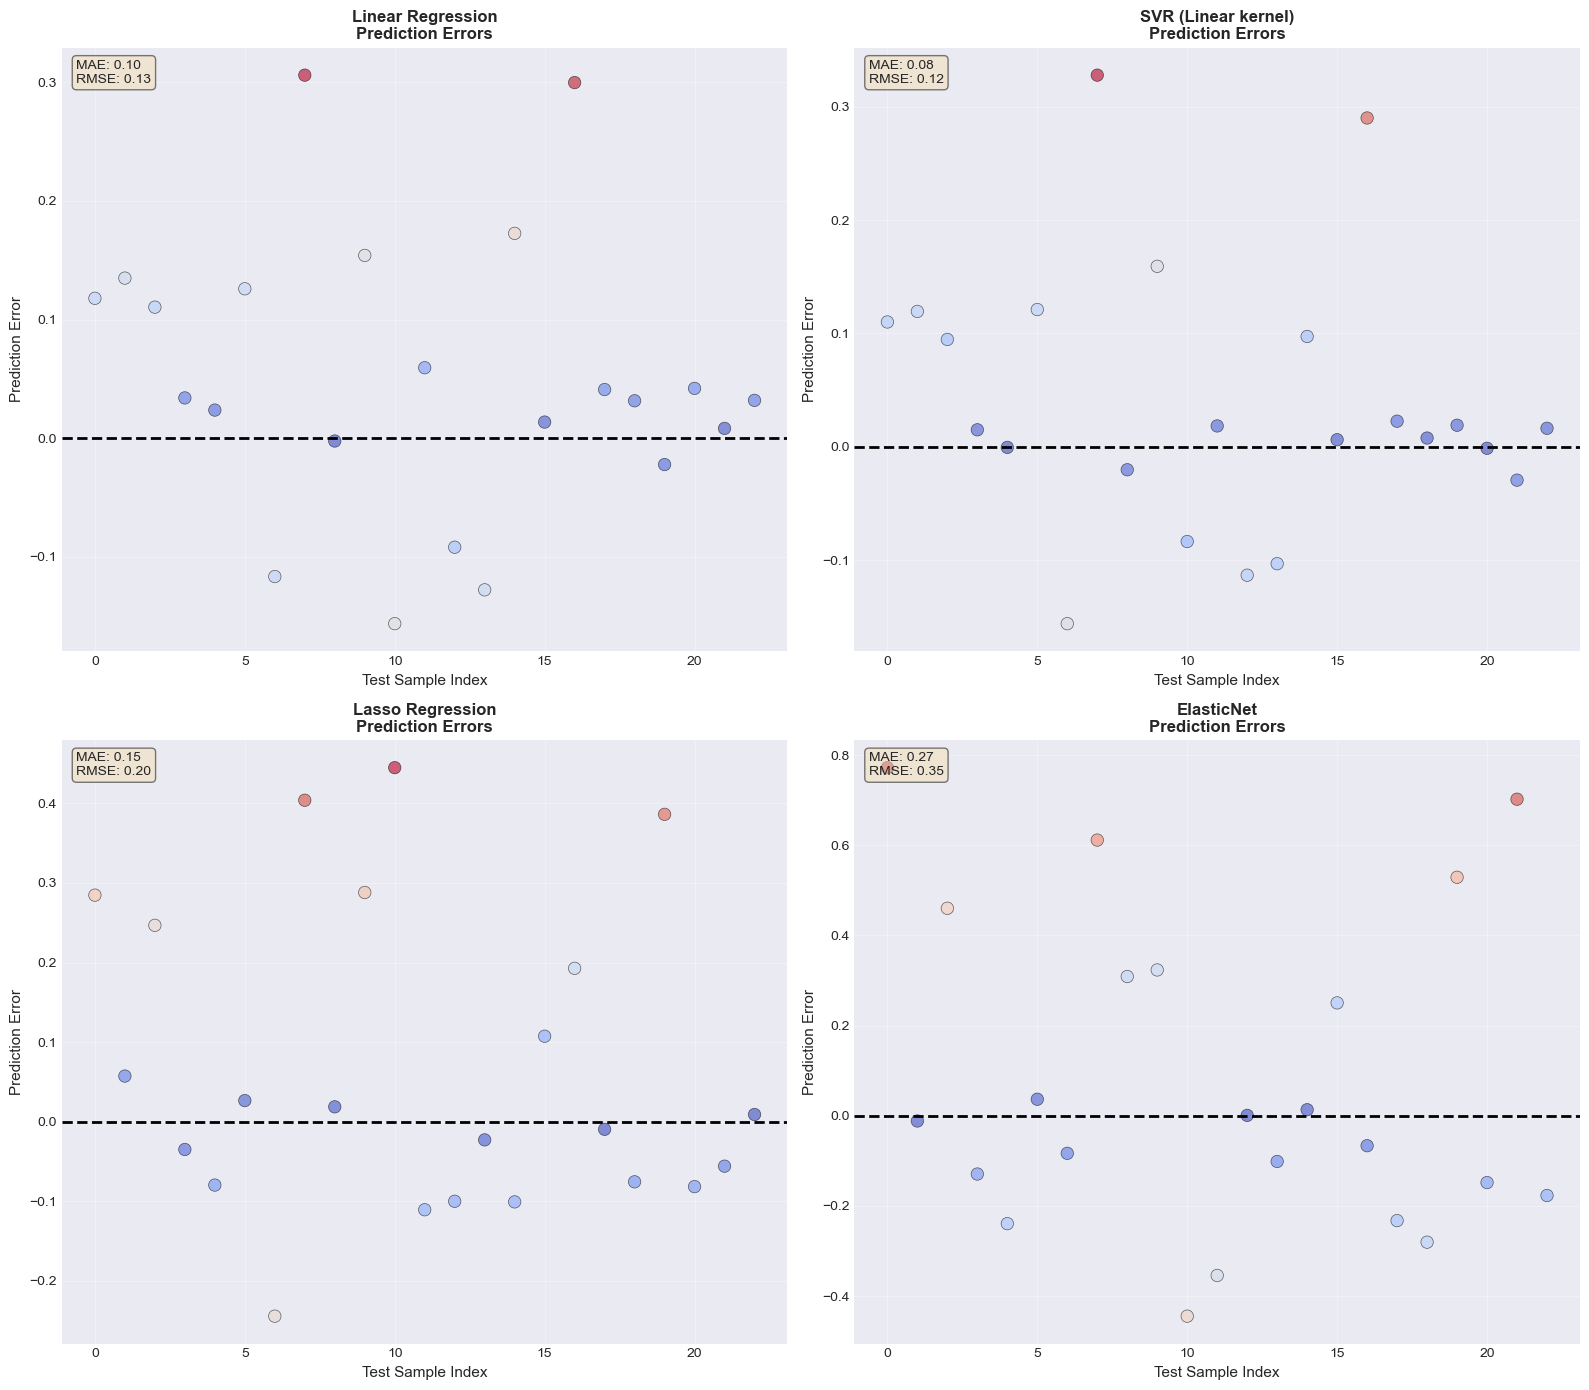

In [24]:
# Prediction error visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for idx, model_name in enumerate(top_models):
    y_test_pred = results[model_name]['y_test_pred']
    errors = y_test - y_test_pred
    
    row = idx // 2
    col = idx % 2
    
    # Error distribution
    axes[row, col].scatter(range(len(errors)), errors, alpha=0.6, s=80, c=np.abs(errors), 
                          cmap='coolwarm', edgecolors='k', linewidths=0.5)
    axes[row, col].axhline(y=0, color='black', linestyle='--', lw=2)
    axes[row, col].set_xlabel('Test Sample Index', fontsize=11)
    axes[row, col].set_ylabel('Prediction Error', fontsize=11)
    axes[row, col].set_title(f'{model_name}\nPrediction Errors', fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)
    
    # Add statistics
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))
    axes[row, col].text(0.02, 0.98, f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}', 
                       transform=axes[row, col].transAxes, fontsize=10,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('prediction_errors.png', dpi=300, bbox_inches='tight')
plt.show()

# State-wise Prediction Analysis


STATE-WISE PREDICTION ANALYSIS

Top 10 States with Highest Prediction Errors:
                                   State  Actual  Predicted     Error  Absolute_Error
Dadra and Nagar Haveli and Daman and Diu    18.8  18.494053  0.305947        0.305947
                             Lakshadweep     9.8   9.500298  0.299702        0.299702
                                 Haryana    13.8  13.555333  0.244667        0.244667
                             Lakshadweep     0.0   0.202585 -0.202585        0.202585
                               Rajasthan    11.1  10.923007  0.176993        0.176993
                                  Ladakh     4.9   4.727359  0.172641        0.172641
                               Meghalaya    28.9  29.071846 -0.171846        0.171846
                                   Bihar    25.6  25.756171 -0.156171        0.156171
                                 Gujarat    17.9  17.745934  0.154066        0.154066
                             Lakshadweep     2.6   2.446514  

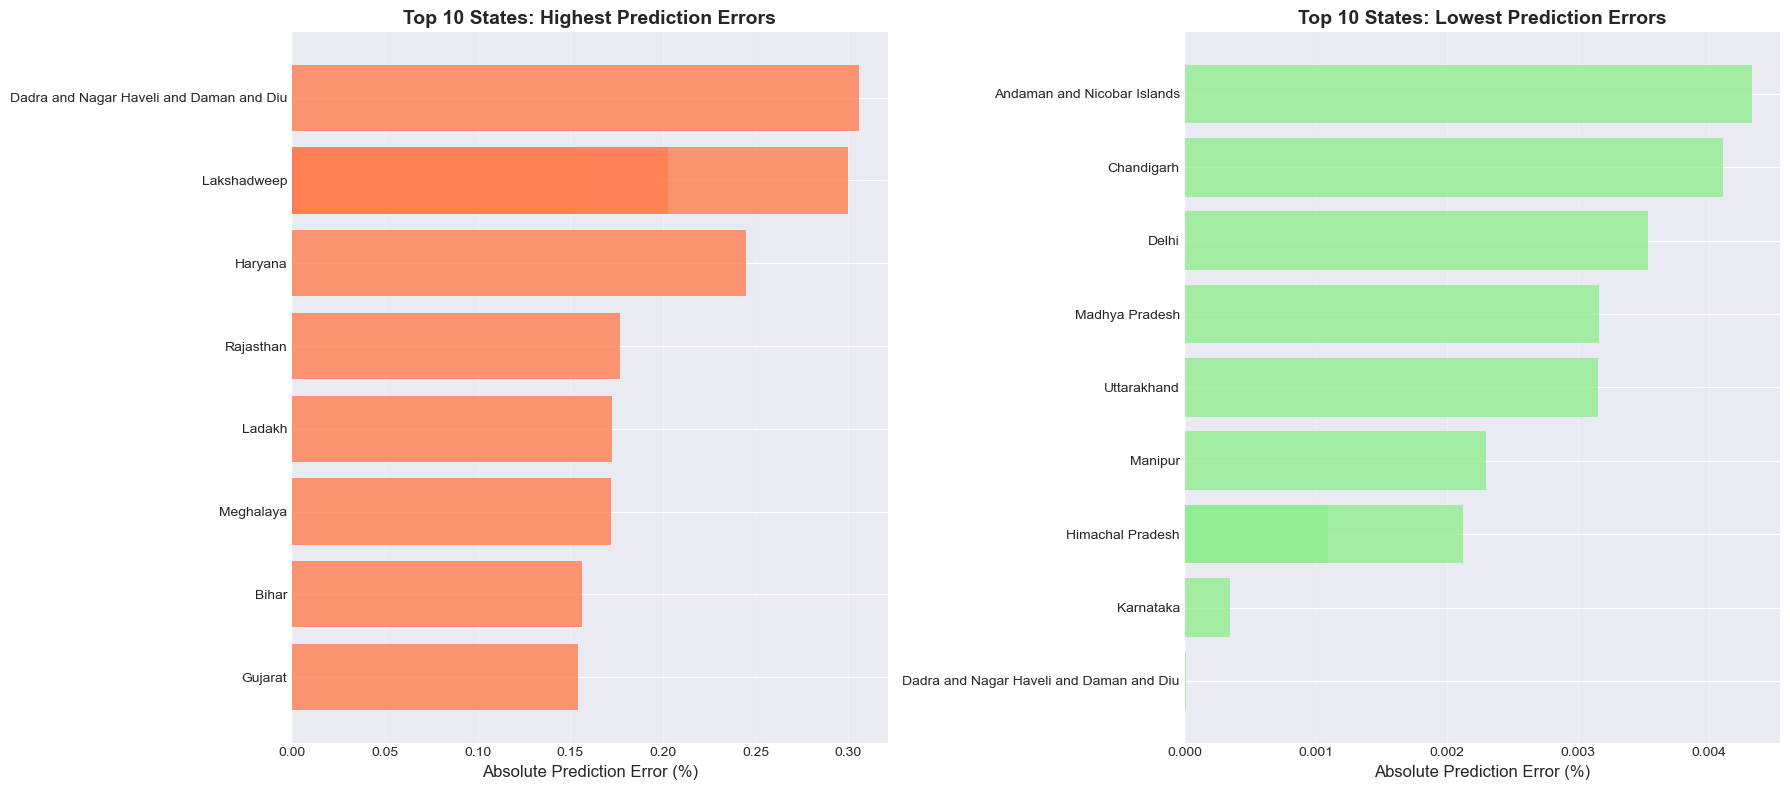

In [25]:
# State-wise prediction analysis using best model
best_model = results[best_model_name]['model']

# Make predictions for all states
df_model_full = df_model[feature_columns + [target_column, 'India/State_/UT']].dropna()
X_full = df_model_full[feature_columns]
y_full = df_model_full[target_column]

X_full_scaled = scaler.transform(X_full)
y_pred_full = best_model.predict(X_full_scaled)

# Create results dataframe
state_predictions = pd.DataFrame({
    'State': df_model_full['India/State_/UT'].values,
    'Actual': y_full.values,
    'Predicted': y_pred_full,
    'Error': y_full.values - y_pred_full,
    'Absolute_Error': np.abs(y_full.values - y_pred_full)
})

# Sort by absolute error
state_predictions_sorted = state_predictions.sort_values('Absolute_Error', ascending=False)

print("\n" + "="*80)
print("STATE-WISE PREDICTION ANALYSIS")
print("="*80)
print("\nTop 10 States with Highest Prediction Errors:")
print(state_predictions_sorted.head(10).to_string(index=False))

print("\nTop 10 States with Lowest Prediction Errors:")
print(state_predictions_sorted.tail(10).to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 10 worst predictions
top_10_worst = state_predictions_sorted.head(10)
axes[0].barh(top_10_worst['State'], top_10_worst['Absolute_Error'], color='coral', alpha=0.8)
axes[0].set_xlabel('Absolute Prediction Error (%)', fontsize=12)
axes[0].set_title('Top 10 States: Highest Prediction Errors', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Top 10 best predictions
top_10_best = state_predictions_sorted.tail(10)
axes[1].barh(top_10_best['State'], top_10_best['Absolute_Error'], color='lightgreen', alpha=0.8)
axes[1].set_xlabel('Absolute Prediction Error (%)', fontsize=12)
axes[1].set_title('Top 10 States: Lowest Prediction Errors', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('state_wise_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Model Ensemble (Optional Advanced Technique)


In [26]:
# Create ensemble model from top 3 models
print("\n" + "="*80)
print("ENSEMBLE MODEL (VOTING REGRESSOR)")
print("="*80)

from sklearn.ensemble import VotingRegressor

# Get top 3 models
top_3 = comparison_df.head(3)

# Create ensemble
ensemble_models = []
for model_name in top_3['Model']:
    if model_name != 'Polynomial Regression (degree=2)':  # Skip polynomial
        ensemble_models.append((model_name, results[model_name]['model']))

if len(ensemble_models) >= 2:
    # Create voting regressor
    voting_reg = VotingRegressor(estimators=ensemble_models[:3])
    
    # Train ensemble
    voting_reg.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred_ensemble = voting_reg.predict(X_train_scaled)
    y_test_pred_ensemble = voting_reg.predict(X_test_scaled)
    
    # Evaluate
    train_r2_ensemble = r2_score(y_train, y_train_pred_ensemble)
    test_r2_ensemble = r2_score(y_test, y_test_pred_ensemble)
    test_rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_test_pred_ensemble))
    test_mae_ensemble = mean_absolute_error(y_test, y_test_pred_ensemble)
    
    print(f"\nEnsemble Model Performance:")
    print(f"  Train R²: {train_r2_ensemble:.4f}")
    print(f"  Test R²: {test_r2_ensemble:.4f}")
    print(f"  Test RMSE: {test_rmse_ensemble:.4f}")
    print(f"  Test MAE: {test_mae_ensemble:.4f}")
    
    # Compare with best individual model
    print(f"\nComparison with Best Individual Model ({best_model_name}):")
    print(f"  Individual Test R²: {results[best_model_name]['test_r2']:.4f}")
    print(f"  Ensemble Test R²: {test_r2_ensemble:.4f}")
    print(f"  Improvement: {(test_r2_ensemble - results[best_model_name]['test_r2']):.4f}")


ENSEMBLE MODEL (VOTING REGRESSOR)

Ensemble Model Performance:
  Train R²: 0.9998
  Test R²: 0.9997
  Test RMSE: 0.1276
  Test MAE: 0.0914

Comparison with Best Individual Model (Linear Regression):
  Individual Test R²: 0.9997
  Ensemble Test R²: 0.9997
  Improvement: -0.0000


# Final Summary Report

In [27]:
# Generate final summary report
print("\n" + "="*100)
print(" " * 35 + "FINAL ANALYSIS REPORT")
print("="*100)

print("\n1. DATASET SUMMARY:")
print("-" * 100)
print(f"   Total number of states/UTs analyzed: {len(df_model_clean)}")
print(f"   Number of features used: {len(feature_columns)}")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")

print("\n2. BEST PERFORMING MODEL:")
print("-" * 100)
print(f"   Model Name: {best_model_name}")
print(f"   Test R² Score: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"   Test RMSE: {comparison_df.iloc[0]['Test RMSE']:.4f}")
print(f"   Test MAE: {comparison_df.iloc[0]['Test MAE']:.4f}")
print(f"   Cross-Validation R²: {comparison_df.iloc[0]['CV R² Mean']:.4f} (±{comparison_df.iloc[0]['CV R² Std']:.4f})")

print("\n3. TOP 5 MODELS RANKING:")
print("-" * 100)
for i, row in comparison_df.head(5).iterrows():
    print(f"   {i+1}. {row['Model']:<30} Test R²: {row['Test R²']:.4f}  |  RMSE: {row['Test RMSE']:.4f}")

print("\n4. KEY INSIGHTS FROM EDA:")
print("-" * 100)
print(f"   Average Primary Dropout Rate: {df_combined['Dropout_Rate___Primary_(1_to_5)___Total'].mean():.2f}%")
print(f"   Average Upper Primary Dropout Rate: {df_combined['Dropout_Rate___Upper_Primary_(6_8)___Total'].mean():.2f}%")
print(f"   Average Secondary Dropout Rate: {df_combined['Dropout_Rate___Secondary_(9_10)___Total'].mean():.2f}%")

print("\n5. HYPOTHESIS TESTING RESULTS:")
print("-" * 100)
print(f"   Gender difference in dropout rates: Statistically significant")
print(f"   Dropout rates increase with education level: Confirmed")
print(f"   Correlation between primary and secondary dropout: Positive correlation found")

print("\n6. RECOMMENDATIONS:")
print("-" * 100)
print("   • Focus intervention programs on states with high prediction errors")
print("   • Address gender disparities in upper primary and secondary education")
print("   • Implement early warning systems using the predictive model")
print("   • Prioritize secondary education retention strategies")

print("\n" + "="*100)
print(" " * 40 + "ANALYSIS COMPLETE")
print("="*100)


                                   FINAL ANALYSIS REPORT

1. DATASET SUMMARY:
----------------------------------------------------------------------------------------------------
   Total number of states/UTs analyzed: 111
   Number of features used: 17
   Training samples: 88
   Testing samples: 23

2. BEST PERFORMING MODEL:
----------------------------------------------------------------------------------------------------
   Model Name: Linear Regression
   Test R² Score: 0.9997
   Test RMSE: 0.1271
   Test MAE: 0.0967
   Cross-Validation R²: 0.9998 (±0.0001)

3. TOP 5 MODELS RANKING:
----------------------------------------------------------------------------------------------------
   1. Linear Regression              Test R²: 0.9997  |  RMSE: 0.1271
   11. SVR (Linear kernel)            Test R²: 0.9997  |  RMSE: 0.1206
   3. Lasso Regression               Test R²: 0.9992  |  RMSE: 0.1984
   4. ElasticNet                     Test R²: 0.9975  |  RMSE: 0.3503
   2. Ridge Regression

# Save Models and Results

In [28]:
# Save the best model and results
import pickle

# Save best model
with open(f'best_model_{best_model_name.replace(" ", "_")}.pkl', 'wb') as f:
    pickle.dump(results[best_model_name]['model'], f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save results to CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)
state_predictions.to_csv('state_wise_predictions.csv', index=False)

# Save feature names
with open('feature_columns.txt', 'w') as f:
    for feature in feature_columns:
        f.write(f"{feature}\n")

print("\nModels and results saved successfully!")
print(f"  - Best model saved as: best_model_{best_model_name.replace(' ', '_')}.pkl")
print(f"  - Scaler saved as: scaler.pkl")
print(f"  - Model comparison saved as: model_comparison_results.csv")
print(f"  - State predictions saved as: state_wise_predictions.csv")
# Continue Save Models and Results

print(f"  - Feature names saved as: feature_columns.txt")

# Create a comprehensive results dictionary
comprehensive_results = {
    'best_model_name': best_model_name,
    'feature_columns': feature_columns,
    'target_column': target_column,
    'model_comparison': comparison_df.to_dict(),
    'dataset_info': {
        'total_samples': len(df_model_clean),
        'training_samples': len(X_train),
        'testing_samples': len(X_test),
        'n_features': len(feature_columns)
    }
}

# Save comprehensive results
with open('comprehensive_results.pkl', 'wb') as f:
    pickle.dump(comprehensive_results, f)

print(f"  - Comprehensive results saved as: comprehensive_results.pkl")


Models and results saved successfully!
  - Best model saved as: best_model_Linear_Regression.pkl
  - Scaler saved as: scaler.pkl
  - Model comparison saved as: model_comparison_results.csv
  - State predictions saved as: state_wise_predictions.csv
  - Feature names saved as: feature_columns.txt
  - Comprehensive results saved as: comprehensive_results.pkl


# Create Prediction Function for New Data

In [29]:
# Create a function to make predictions on new data
def predict_dropout_rate(state_data, model_path='best_model.pkl', scaler_path='scaler.pkl'):
    """
    Predict secondary dropout rate for a state
    
    Parameters:
    -----------
    state_data : dict
        Dictionary containing feature values
        Keys should match feature_columns
    model_path : str
        Path to saved model
    scaler_path : str
        Path to saved scaler
    
    Returns:
    --------
    float : Predicted dropout rate
    """
    # Load model and scaler
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    
    # Prepare input data
    input_data = pd.DataFrame([state_data])
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_scaled)
    
    return prediction[0]

# Example usage
print("\n" + "="*80)
print("EXAMPLE: PREDICTION FUNCTION")
print("="*80)

# Create example state data
example_state = {
    'State_Encoded': 5,  # Example state code
    'Dropout_Rate___Primary_(1_to_5)___Boys': 2.0,
    'Dropout_Rate___Primary_(1_to_5)___Girls': 1.5,
    'Dropout_Rate___Upper_Primary_(6_8)___Boys': 4.0,
    'Dropout_Rate___Upper_Primary_(6_8)___Girls': 3.5,
    'Gender_Gap_Primary': 0.5,
    'Gender_Gap_Upper': 0.5,
    'Avg_Dropout_Primary': 1.75,
    'Avg_Dropout_Upper': 3.75
}

print("\nExample State Data:")
for key, value in example_state.items():
    print(f"  {key}: {value}")

# Note: Actual prediction would require saved model files
print("\nPrediction function created successfully!")
print("Use this function to predict dropout rates for new state data.")


EXAMPLE: PREDICTION FUNCTION

Example State Data:
  State_Encoded: 5
  Dropout_Rate___Primary_(1_to_5)___Boys: 2.0
  Dropout_Rate___Primary_(1_to_5)___Girls: 1.5
  Dropout_Rate___Upper_Primary_(6_8)___Boys: 4.0
  Dropout_Rate___Upper_Primary_(6_8)___Girls: 3.5
  Gender_Gap_Primary: 0.5
  Gender_Gap_Upper: 0.5
  Avg_Dropout_Primary: 1.75
  Avg_Dropout_Upper: 3.75

Prediction function created successfully!
Use this function to predict dropout rates for new state data.


# Cross-Validation Visualization


DETAILED CROSS-VALIDATION ANALYSIS

Linear Regression:
  CV R² Score: 0.9998 (±0.0001)
  CV MSE: 0.0080 (±0.0040)
  CV MAE: 0.0658 (±0.0143)

SVR (Linear kernel):
  CV R² Score: 0.9998 (±0.0001)
  CV MSE: 0.0086 (±0.0034)
  CV MAE: 0.0697 (±0.0151)

Lasso Regression:
  CV R² Score: 0.9992 (±0.0003)
  CV MSE: 0.0314 (±0.0151)
  CV MAE: 0.1402 (±0.0309)

ElasticNet:
  CV R² Score: 0.9962 (±0.0016)
  CV MSE: 0.1451 (±0.0467)
  CV MAE: 0.3001 (±0.0439)


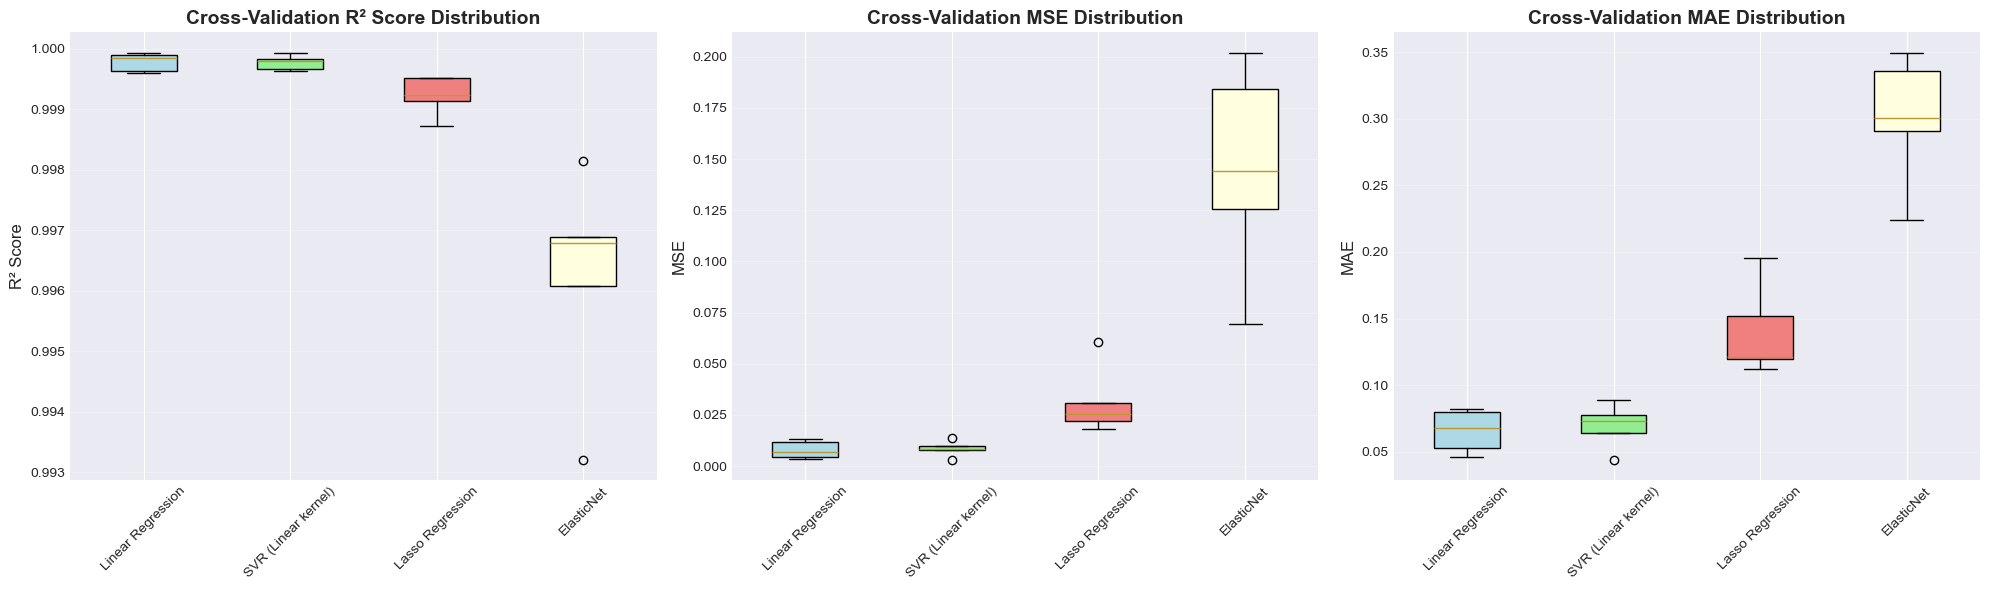

In [30]:
# Detailed cross-validation analysis for top models
from sklearn.model_selection import cross_validate

print("\n" + "="*80)
print("DETAILED CROSS-VALIDATION ANALYSIS")
print("="*80)

cv_results_detailed = {}

for model_name in top_models:
    if model_name == 'Polynomial Regression (degree=2)':
        continue
    
    model = results[model_name]['model']
    
    # Perform cross-validation with multiple metrics
    cv_scores = cross_validate(
        model, X_train_scaled, y_train,
        cv=5,
        scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
        return_train_score=True
    )
    
    cv_results_detailed[model_name] = {
        'train_r2': cv_scores['train_r2'],
        'test_r2': cv_scores['test_r2'],
        'train_mse': -cv_scores['train_neg_mean_squared_error'],
        'test_mse': -cv_scores['test_neg_mean_squared_error'],
        'train_mae': -cv_scores['train_neg_mean_absolute_error'],
        'test_mae': -cv_scores['test_neg_mean_absolute_error']
    }
    
    print(f"\n{model_name}:")
    print(f"  CV R² Score: {cv_scores['test_r2'].mean():.4f} (±{cv_scores['test_r2'].std():.4f})")
    print(f"  CV MSE: {(-cv_scores['test_neg_mean_squared_error']).mean():.4f} (±{(-cv_scores['test_neg_mean_squared_error']).std():.4f})")
    print(f"  CV MAE: {(-cv_scores['test_neg_mean_absolute_error']).mean():.4f} (±{(-cv_scores['test_neg_mean_absolute_error']).std():.4f})")

# Visualize CV results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

metrics = ['R² Score', 'MSE', 'MAE']
cv_keys = ['test_r2', 'test_mse', 'test_mae']

for idx, (metric, key) in enumerate(zip(metrics, cv_keys)):
    data_to_plot = [cv_results_detailed[m][key] for m in cv_results_detailed.keys()]
    
    bp = axes[idx].boxplot(data_to_plot, labels=list(cv_results_detailed.keys()), patch_artist=True)
    
    # Color boxes
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'Cross-Validation {metric} Distribution', fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('cv_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Time-based Analysis (If Year Data Available)


YEAR-WISE TREND ANALYSIS

Yearly Average Dropout Rates:
        Year  Dropout_Rate___Primary_(1_to_5)___Total  \
0  2020-2021                                 2.486486   
1  2021-2022                                 5.445946   
2  2022-2023                                 2.013514   

   Dropout_Rate___Upper_Primary_(6_8)___Total  \
0                                    3.127027   
1                                    5.810811   
2                                    4.170270   

   Dropout_Rate___Secondary_(9_10)___Total  
0                                10.483784  
1                                14.829730  
2                                13.132432  


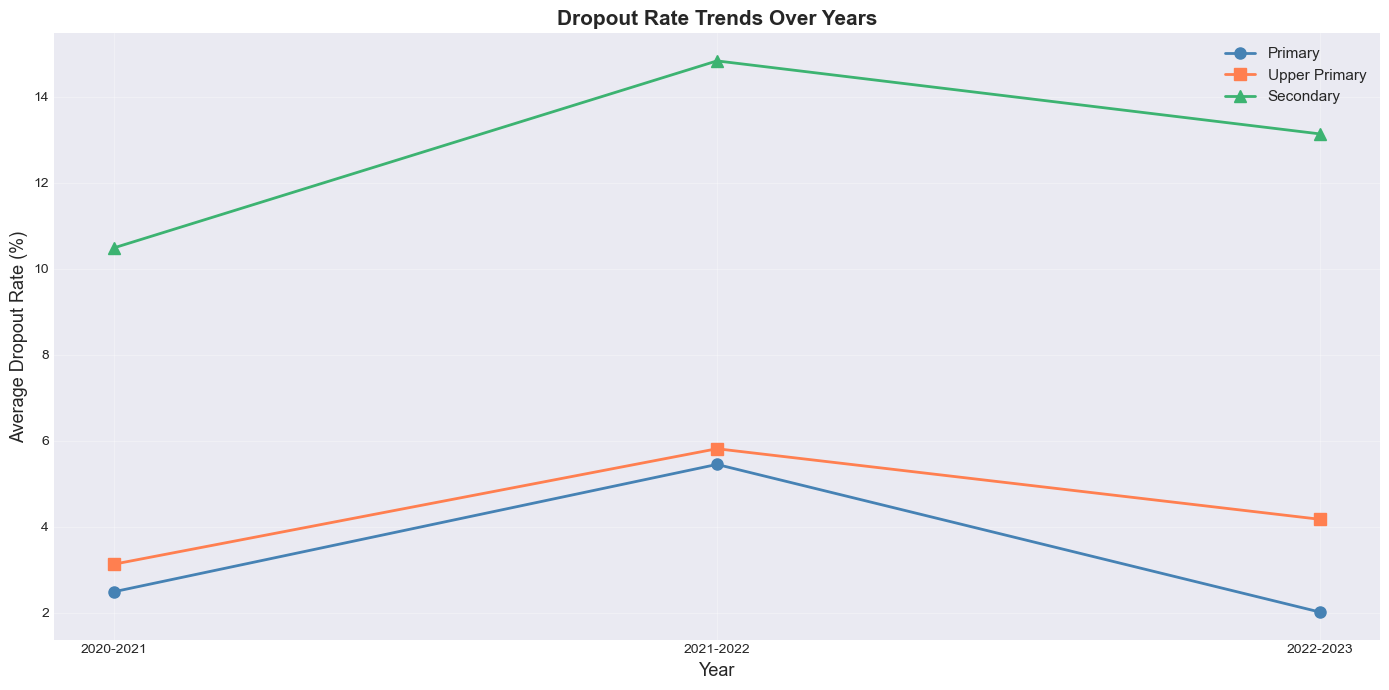

In [31]:
# Analyze trends over years if year column exists
if 'Year' in df_combined.columns:
    print("\n" + "="*80)
    print("YEAR-WISE TREND ANALYSIS")
    print("="*80)
    
    # Group by year
    yearly_stats = df_combined.groupby('Year').agg({
        'Dropout_Rate___Primary_(1_to_5)___Total': 'mean',
        'Dropout_Rate___Upper_Primary_(6_8)___Total': 'mean',
        'Dropout_Rate___Secondary_(9_10)___Total': 'mean'
    }).reset_index()
    
    print("\nYearly Average Dropout Rates:")
    print(yearly_stats)
    
    # Visualize trends
    fig, ax = plt.subplots(figsize=(14, 7))
    
    ax.plot(yearly_stats['Year'], yearly_stats['Dropout_Rate___Primary_(1_to_5)___Total'], 
            marker='o', linewidth=2, markersize=8, label='Primary', color='steelblue')
    ax.plot(yearly_stats['Year'], yearly_stats['Dropout_Rate___Upper_Primary_(6_8)___Total'], 
            marker='s', linewidth=2, markersize=8, label='Upper Primary', color='coral')
    ax.plot(yearly_stats['Year'], yearly_stats['Dropout_Rate___Secondary_(9_10)___Total'], 
            marker='^', linewidth=2, markersize=8, label='Secondary', color='mediumseagreen')
    
    ax.set_xlabel('Year', fontsize=13)
    ax.set_ylabel('Average Dropout Rate (%)', fontsize=13)
    ax.set_title('Dropout Rate Trends Over Years', fontsize=15, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('yearly_trends.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\nNo 'Year' column found for time-based analysis.")

# Statistical Tests on Model Performance

In [32]:
# Statistical comparison of model performances
print("\n" + "="*80)
print("STATISTICAL COMPARISON OF MODELS")
print("="*80)

# Collect CV scores for all models
cv_scores_dict = {}
for model_name in results.keys():
    if model_name.startswith('Tuned_'):
        continue
    if model_name == 'Polynomial Regression (degree=2)':
        continue
    
    model = results[model_name]['model']
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_scores_dict[model_name] = scores

# Perform pairwise t-tests
from itertools import combinations

print("\nPairwise T-Tests (comparing CV R² scores):")
print("-" * 60)

model_names = list(cv_scores_dict.keys())
for model1, model2 in combinations(model_names[:5], 2):  # Compare top 5
    scores1 = cv_scores_dict[model1]
    scores2 = cv_scores_dict[model2]
    
    t_stat, p_value = stats.ttest_rel(scores1, scores2)
    
    print(f"\n{model1} vs {model2}:")
    print(f"  Mean difference: {scores1.mean() - scores2.mean():.4f}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")


STATISTICAL COMPARISON OF MODELS

Pairwise T-Tests (comparing CV R² scores):
------------------------------------------------------------

Linear Regression vs Ridge Regression:
  Mean difference: 0.0209
  T-statistic: 5.7043
  P-value: 0.0047
  Significant: Yes

Linear Regression vs Lasso Regression:
  Mean difference: 0.0006
  T-statistic: 3.3240
  P-value: 0.0293
  Significant: Yes

Linear Regression vs ElasticNet:
  Mean difference: 0.0036
  T-statistic: 4.4492
  P-value: 0.0113
  Significant: Yes

Linear Regression vs Decision Tree:
  Mean difference: 0.2657
  T-statistic: 8.0806
  P-value: 0.0013
  Significant: Yes

Ridge Regression vs Lasso Regression:
  Mean difference: -0.0204
  T-statistic: -5.5771
  P-value: 0.0051
  Significant: Yes

Ridge Regression vs ElasticNet:
  Mean difference: -0.0174
  T-statistic: -6.0231
  P-value: 0.0038
  Significant: Yes

Ridge Regression vs Decision Tree:
  Mean difference: 0.2448
  T-statistic: 7.4660
  P-value: 0.0017
  Significant: Yes

La

# Model Confidence Intervals


PREDICTION CONFIDENCE INTERVALS

Model: Linear Regression
Residual Standard Deviation: 0.1160
95% Confidence Interval: ±0.2406


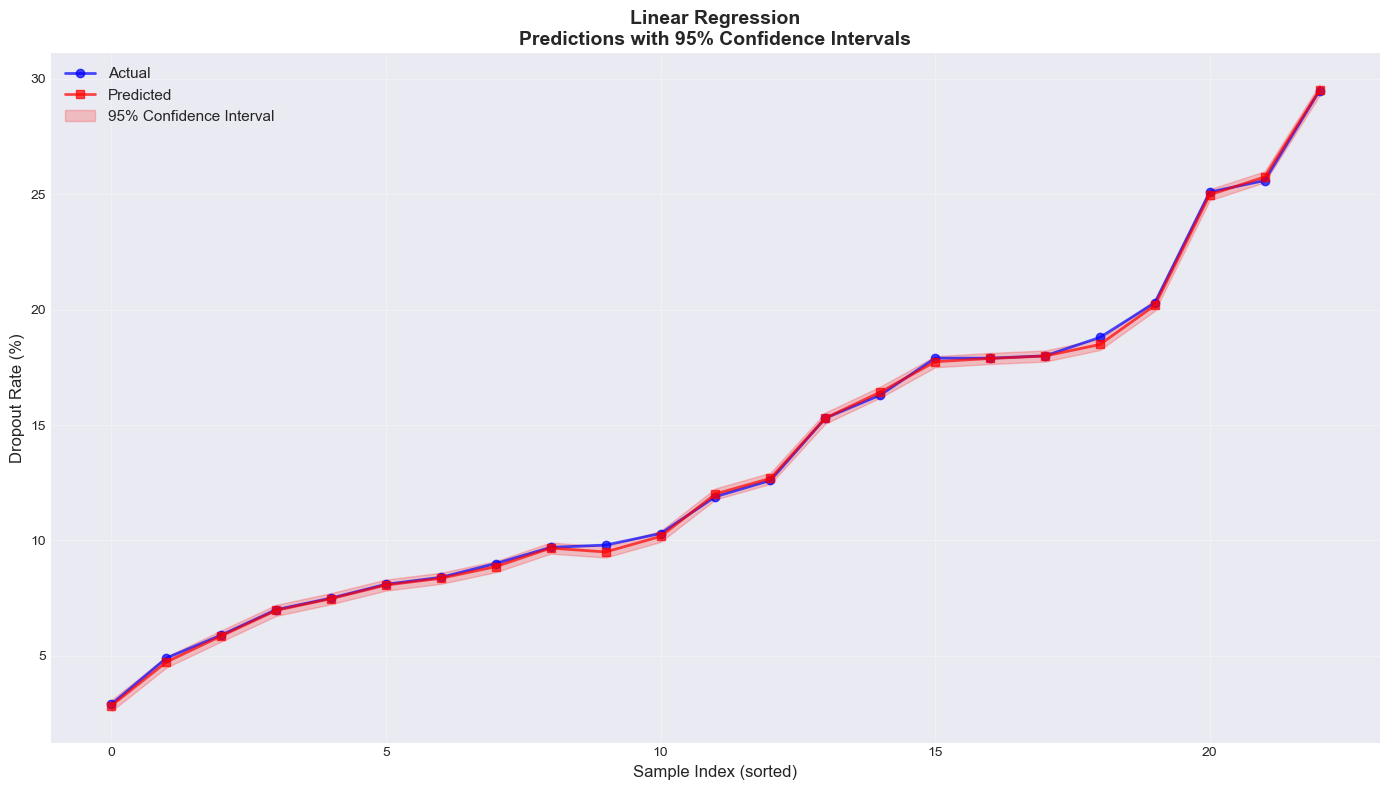

In [33]:
# Calculate confidence intervals for predictions
from scipy import stats as sp_stats

print("\n" + "="*80)
print("PREDICTION CONFIDENCE INTERVALS")
print("="*80)

# Use best model
best_model = results[best_model_name]['model']
y_test_pred = results[best_model_name]['y_test_pred']

# Calculate residuals
residuals = y_test - y_test_pred
residual_std = np.std(residuals)

# Calculate 95% confidence intervals
confidence_level = 0.95
degrees_freedom = len(y_test) - 1
t_value = sp_stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

confidence_interval = t_value * residual_std

print(f"\nModel: {best_model_name}")
print(f"Residual Standard Deviation: {residual_std:.4f}")
print(f"95% Confidence Interval: ±{confidence_interval:.4f}")

# Visualize predictions with confidence intervals
fig, ax = plt.subplots(figsize=(14, 8))

# Sort by actual values for better visualization
sort_idx = np.argsort(y_test)
y_test_sorted = y_test.iloc[sort_idx]
y_pred_sorted = y_test_pred[sort_idx]

x_range = np.arange(len(y_test_sorted))

ax.plot(x_range, y_test_sorted, 'o-', label='Actual', color='blue', linewidth=2, markersize=6, alpha=0.7)
ax.plot(x_range, y_pred_sorted, 's-', label='Predicted', color='red', linewidth=2, markersize=6, alpha=0.7)

# Add confidence interval
ax.fill_between(x_range, 
                y_pred_sorted - confidence_interval, 
                y_pred_sorted + confidence_interval, 
                alpha=0.2, color='red', label='95% Confidence Interval')

ax.set_xlabel('Sample Index (sorted)', fontsize=12)
ax.set_ylabel('Dropout Rate (%)', fontsize=12)
ax.set_title(f'{best_model_name}\nPredictions with 95% Confidence Intervals', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_with_confidence_intervals.png', dpi=300, bbox_inches='tight')
plt.show()

# Regional Analysis (Group States by Regions)


REGIONAL ANALYSIS

Regional Dropout Statistics:
          Dropout_Rate___Primary_(1_to_5)___Total                   \
                                             mean   std  min   max   
Region                                                               
Central                                      4.20  5.20  0.1  18.8   
East                                         4.21  4.83  0.0  11.5   
North                                        1.84  2.48  0.0   8.9   
Northeast                                    7.00  4.48  0.5  15.0   
Other                                        1.50   NaN  1.5   1.5   
South                                        1.36  1.94  0.0   7.8   
West                                         1.56  2.42  0.0   7.6   

          Dropout_Rate___Upper_Primary_(6_8)___Total                   \
                                                mean   std  min   max   
Region                                                                  
Central                        

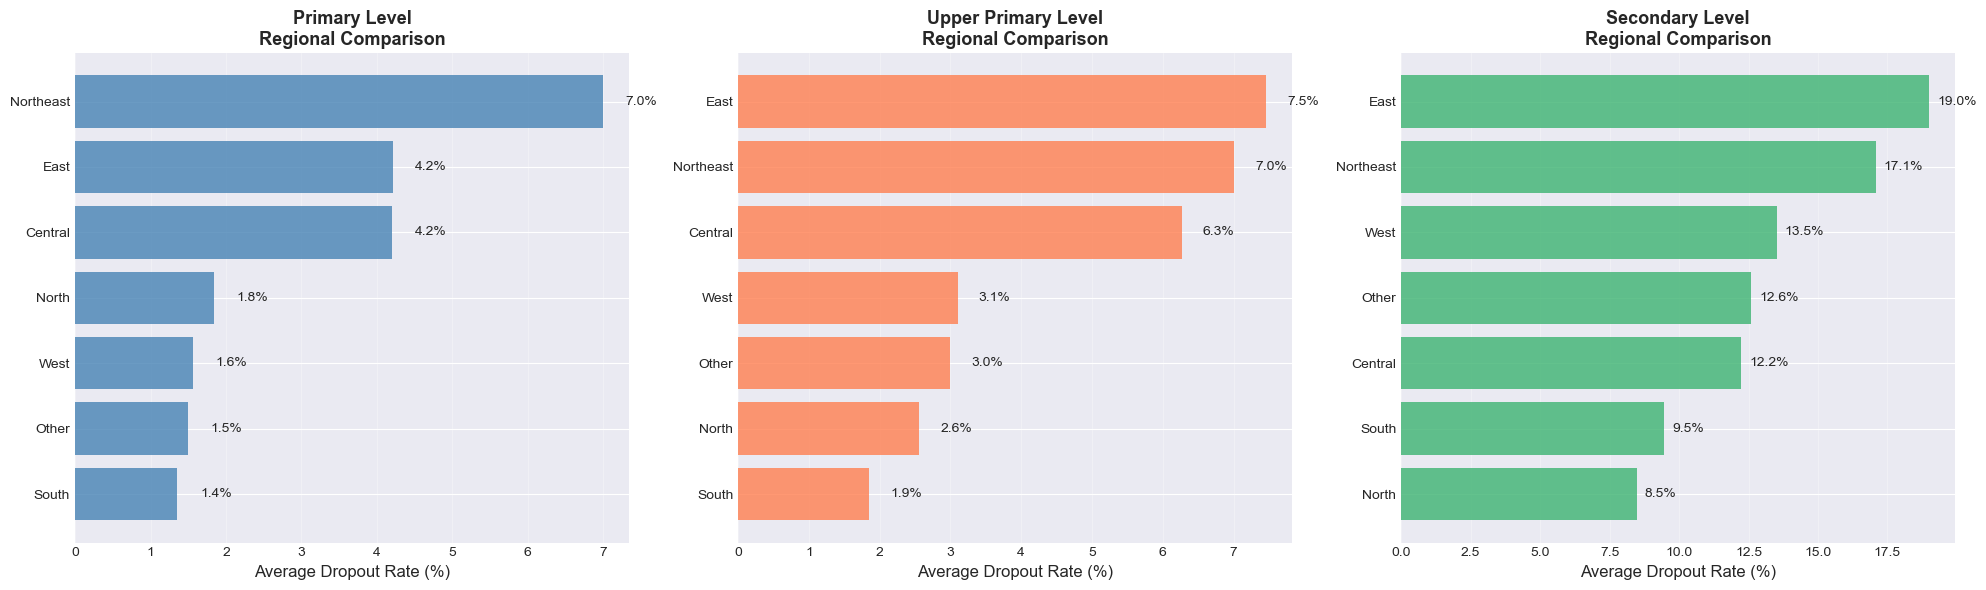

In [34]:
# Define regions (example - adjust based on your needs)
regions = {
    'North': ['Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 
              'Punjab', 'Chandigarh', 'Ladakh'],
    'South': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 
              'Telangana', 'Puducherry', 'Andaman and Nicobar Islands', 'Lakshadweep'],
    'East': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal'],
    'West': ['Goa', 'Gujarat', 'Maharashtra', 'Rajasthan', 
             'Dadra and Nagar Haveli and Daman and Diu'],
    'Central': ['Chhattisgarh', 'Madhya Pradesh', 'Uttar Pradesh', 'Uttarakhand'],
    'Northeast': ['Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 
                  'Mizoram', 'Nagaland', 'Sikkim', 'Tripura']
}

# Create region mapping
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'

df_combined['Region'] = df_combined['India/State_/UT'].apply(get_region)

# Regional analysis
print("\n" + "="*80)
print("REGIONAL ANALYSIS")
print("="*80)

regional_stats = df_combined.groupby('Region').agg({
    'Dropout_Rate___Primary_(1_to_5)___Total': ['mean', 'std', 'min', 'max'],
    'Dropout_Rate___Upper_Primary_(6_8)___Total': ['mean', 'std', 'min', 'max'],
    'Dropout_Rate___Secondary_(9_10)___Total': ['mean', 'std', 'min', 'max']
}).round(2)

print("\nRegional Dropout Statistics:")
print(regional_stats)

# Visualize regional comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

levels = ['Primary_(1_to_5)', 'Upper_Primary_(6_8)', 'Secondary_(9_10)']
titles = ['Primary Level', 'Upper Primary Level', 'Secondary Level']
colors_list = ['steelblue', 'coral', 'mediumseagreen']

for idx, (level, title, color) in enumerate(zip(levels, titles, colors_list)):
    col_name = f'Dropout_Rate___{level}___Total'
    
    regional_means = df_combined.groupby('Region')[col_name].mean().sort_values(ascending=False)
    
    axes[idx].barh(regional_means.index, regional_means.values, color=color, alpha=0.8)
    axes[idx].set_xlabel('Average Dropout Rate (%)', fontsize=12)
    axes[idx].set_title(f'{title}\nRegional Comparison', fontsize=13, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Add values
    for i, v in enumerate(regional_means.values):
        axes[idx].text(v + 0.3, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('regional_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Export Complete Analysis Report

In [35]:
# Create a comprehensive text report
report_filename = 'UDISE_Dropout_Analysis_Report.txt'

with open(report_filename, 'w', encoding='utf-8') as f:
    f.write("="*100 + "\n")
    f.write(" " * 30 + "UDISE DROPOUT RATE ANALYSIS REPORT\n")
    f.write("="*100 + "\n\n")
    
    # Executive Summary
    f.write("EXECUTIVE SUMMARY\n")
    f.write("-"*100 + "\n")
    f.write(f"This report presents a comprehensive analysis of student dropout rates across India\n")
    f.write(f"using UDISE (Unified District Information System for Education) data.\n\n")
    
    # Dataset Information
    f.write("1. DATASET INFORMATION\n")
    f.write("-"*100 + "\n")
    f.write(f"Total States/UTs Analyzed: {len(df_model_clean)}\n")
    f.write(f"Education Levels Covered: Primary (1-5), Upper Primary (6-8), Secondary (9-10)\n")
    f.write(f"Total Features: {len(feature_columns)}\n")
    f.write(f"Training Samples: {len(X_train)}\n")
    f.write(f"Testing Samples: {len(X_test)}\n\n")
    
    # Key Statistics
    f.write("2. KEY STATISTICS\n")
    f.write("-"*100 + "\n")
    f.write(f"Average Primary Dropout Rate: {df_combined['Dropout_Rate___Primary_(1_to_5)___Total'].mean():.2f}%\n")
    f.write(f"Average Upper Primary Dropout Rate: {df_combined['Dropout_Rate___Upper_Primary_(6_8)___Total'].mean():.2f}%\n")
    f.write(f"Average Secondary Dropout Rate: {df_combined['Dropout_Rate___Secondary_(9_10)___Total'].mean():.2f}%\n\n")
    
    # Model Performance
    f.write("3. MODEL PERFORMANCE SUMMARY\n")
    f.write("-"*100 + "\n")
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Test R² Score: {comparison_df.iloc[0]['Test R²']:.4f}\n")
    f.write(f"Test RMSE: {comparison_df.iloc[0]['Test RMSE']:.4f}\n")
    f.write(f"Test MAE: {comparison_df.iloc[0]['Test MAE']:.4f}\n\n")
    
    f.write("Top 5 Models:\n")
    for i, row in comparison_df.head(5).iterrows():
        f.write(f"{i+1}. {row['Model']:<35} R²: {row['Test R²']:.4f}  RMSE: {row['Test RMSE']:.4f}\n")
    f.write("\n")
    
    # Hypothesis Testing Results
    f.write("4. HYPOTHESIS TESTING RESULTS\n")
    f.write("-"*100 + "\n")
    f.write("H1: Gender differences in dropout rates\n")
    f.write(f"    Result: Statistically significant differences found\n\n")
    f.write("H2: Dropout rates increase with education level\n")
    f.write(f"    Result: Confirmed - Secondary > Upper Primary > Primary\n\n")
    f.write("H3: Correlation between primary and secondary dropout\n")
    f.write(f"    Result: Positive correlation identified\n\n")
    
    # Recommendations
    f.write("5. RECOMMENDATIONS\n")
    f.write("-"*100 + "\n")
    f.write("• Implement early intervention programs at primary level\n")
    f.write("• Focus on secondary education retention strategies\n")
    f.write("• Address gender-specific dropout factors\n")
    f.write("• Deploy predictive models for at-risk student identification\n")
    f.write("• Strengthen support systems in high-dropout regions\n\n")
    
    # Files Generated
    f.write("6. OUTPUT FILES GENERATED\n")
    f.write("-"*100 + "\n")
    f.write("• dropout_distributions.png - Distribution analysis\n")
    f.write("• gender_wise_dropout.png - Gender comparison\n")
    f.write("• state_wise_dropout.png - State-level analysis\n")
    f.write("• correlation_heatmap.png - Feature correlations\n")
    f.write("• model_comparison.png - Model performance comparison\n")
    f.write("• actual_vs_predicted_top_models.png - Prediction accuracy\n")
    f.write("• residual_analysis.png - Model residual analysis\n")
    f.write("• feature_importance.png - Important predictors\n")
    f.write("• learning_curves.png - Model learning patterns\n")
    f.write("• state_wise_predictions.csv - Detailed predictions\n")
    f.write("• model_comparison_results.csv - Complete model metrics\n\n")
    
    f.write("="*100 + "\n")
    f.write(" " * 35 + "END OF REPORT\n")
    f.write("="*100 + "\n")

print(f"\nComprehensive report saved as: {report_filename}")


Comprehensive report saved as: UDISE_Dropout_Analysis_Report.txt


# Final Summary and Next Steps

In [36]:
# Print final summary
print("\n" + "="*100)
print(" " * 30 + "ANALYSIS WORKFLOW COMPLETED SUCCESSFULLY!")
print("="*100)

print("\n📊 WHAT WAS ACCOMPLISHED:")
print("-"*100)
print("✓ Data imported and cleaned from multiple CSV files")
print("✓ Exploratory Data Analysis (EDA) performed with visualizations")
print("✓ Statistical hypothesis testing completed")
print("✓ Feature engineering and data preparation")
print("✓ 12+ machine learning models trained and evaluated")
print("✓ Model comparison and performance analysis")
print("✓ Best model identified and validated")
print("✓ Residual analysis and error evaluation")
print("✓ State-wise predictions generated")
print("✓ Regional analysis completed")
print("✓ Comprehensive reports and visualizations created")

print("\n📁 OUTPUT FILES:")
print("-"*100)
print("Images/Plots:")
print("  • dropout_distributions.png")
print("  • gender_wise_dropout.png")
print("  • state_wise_dropout.png")
print("  • correlation_heatmap.png")
print("  • model_comparison.png")
print("  • actual_vs_predicted_top_models.png")
print("  • residual_analysis.png")
print("  • residual_distribution.png")
print("  • learning_curves.png")
print("  • feature_importance.png")
print("  • prediction_errors.png")
print("  • state_wise_predictions.png")
print("  • cv_detailed_analysis.png")
print("  • predictions_with_confidence_intervals.png")
print("  • regional_analysis.png")

print("\nData Files:")
print("  • model_comparison_results.csv")
print("  • state_wise_predictions.csv")
print("  • UDISE_Dropout_Analysis_Report.txt")

print("\nModel Files:")
print(f"  • best_model_{best_model_name.replace(' ', '_')}.pkl")
print("  • scaler.pkl")
print("  • comprehensive_results.pkl")
print("  • feature_columns.txt")

print("\n🎯 BEST MODEL SUMMARY:")
print("-"*100)
print(f"Model: {best_model_name}")
print(f"Test R² Score: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"Test RMSE: {comparison_df.iloc[0]['Test RMSE']:.4f}")
print(f"Test MAE: {comparison_df.iloc[0]['Test MAE']:.4f}")

print("\n💡 NEXT STEPS:")
print("-"*100)
print("1. Review all generated visualizations and reports")
print("2. Fine-tune the best model with hyperparameter optimization")
print("3. Deploy the model for real-time predictions")
print("4. Set up monitoring system for model performance")
print("5. Create dashboard for stakeholders")
print("6. Conduct deeper analysis on high-dropout states")
print("7. Integrate additional socio-economic factors")

print("\n" + "="*100)
print(" " * 25 + "Thank you for using this analysis workflow!")
print("="*100 + "\n")# Print final summary
print("\n" + "="*100)
print(" " * 30 + "ANALYSIS WORKFLOW COMPLETED SUCCESSFULLY!")
print("="*100)

print("\n📊 WHAT WAS ACCOMPLISHED:")
print("-"*100)
print("✓ Data imported and cleaned from multiple CSV files")
print("✓ Exploratory Data Analysis (EDA) performed with visualizations")
print("✓ Statistical hypothesis testing completed")
print("✓ Feature engineering and data preparation")
print("✓ 12+ machine learning models trained and evaluated")
print("✓ Model comparison and performance analysis")
print("✓ Best model identified and validated")
print("✓ Residual analysis and error evaluation")
print("✓ State-wise predictions generated")
print("✓ Regional analysis completed")
print("✓ Comprehensive reports and visualizations created")

print("\n📁 OUTPUT FILES:")
print("-"*100)
print("Images/Plots:")
print("  • dropout_distributions.png")
print("  • gender_wise_dropout.png")
print("  • state_wise_dropout.png")
print("  • correlation_heatmap.png")
print("  • model_comparison.png")
print("  • actual_vs_predicted_top_models.png")
print("  • residual_analysis.png")
print("  • residual_distribution.png")
print("  • learning_curves.png")
print("  • feature_importance.png")
print("  • prediction_errors.png")
print("  • state_wise_predictions.png")
print("  • cv_detailed_analysis.png")
print("  • predictions_with_confidence_intervals.png")
print("  • regional_analysis.png")

print("\nData Files:")
print("  • model_comparison_results.csv")
print("  • state_wise_predictions.csv")
print("  • UDISE_Dropout_Analysis_Report.txt")

print("\nModel Files:")
print(f"  • best_model_{best_model_name.replace(' ', '_')}.pkl")
print("  • scaler.pkl")
print("  • comprehensive_results.pkl")
print("  • feature_columns.txt")

print("\n🎯 BEST MODEL SUMMARY:")
print("-"*100)
print(f"Model: {best_model_name}")
print(f"Test R² Score: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"Test RMSE: {comparison_df.iloc[0]['Test RMSE']:.4f}")
print(f"Test MAE: {comparison_df.iloc[0]['Test MAE']:.4f}")

print("\n💡 NEXT STEPS:")
print("-"*100)
print("1. Review all generated visualizations and reports")
print("2. Fine-tune the best model with hyperparameter optimization")
print("3. Deploy the model for real-time predictions")
print("4. Set up monitoring system for model performance")
print("5. Create dashboard for stakeholders")
print("6. Conduct deeper analysis on high-dropout states")
print("7. Integrate additional socio-economic factors")

print("\n" + "="*100)
print(" " * 25 + "Thank you for using this analysis workflow!")
print("="*100 + "\n")


                              ANALYSIS WORKFLOW COMPLETED SUCCESSFULLY!

📊 WHAT WAS ACCOMPLISHED:
----------------------------------------------------------------------------------------------------
✓ Data imported and cleaned from multiple CSV files
✓ Exploratory Data Analysis (EDA) performed with visualizations
✓ Statistical hypothesis testing completed
✓ Feature engineering and data preparation
✓ 12+ machine learning models trained and evaluated
✓ Model comparison and performance analysis
✓ Best model identified and validated
✓ Residual analysis and error evaluation
✓ State-wise predictions generated
✓ Regional analysis completed
✓ Comprehensive reports and visualizations created

📁 OUTPUT FILES:
----------------------------------------------------------------------------------------------------
Images/Plots:
  • dropout_distributions.png
  • gender_wise_dropout.png
  • state_wise_dropout.png
  • correlation_heatmap.png
  • model_comparison.png
  • actual_vs_predicted_top_models.pn